# Анализ продаж компьютерных игр

## Описание проекта

### Описание данных

Входные данные - полученные из открытых источников исторические данные о продажах игр, оценках пользователей и критиков, жанрах и платформах (например, Xbox или PlayStation). Имеются данные до 2016 года.

*Примечание*: Данные за 2016 год могут быть неполными.

Для каждой игры представлены следующие данные:
- `Name` — название игры;
- `Platform` — платформа;
- `Year_of_Release` — год выпуска;
- `Genre` — жанр игры;
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий);
- `EU_sales` — продажи в Европе (миллионы проданных копий);
- `JP_sales` — продажи в Японии (миллионы проданных копий);
- `Other_sales` — продажи в других странах (миллионы проданных копий);
- `Critic_Score` — оценка критиков (максимум 100);
- `User_Score` — оценка пользователей (максимум 10);
- `Rating` — рейтинг ESRB.  

*Примечание*: Entertainment Software Rating Board (ESRB) — ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Цель исследования

Выявить закономерности, определяющие успешность компьютерных игр. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на следующий год для интернет-магазина, который продаёт по всему миру компьютерные игры.

### Задачи исследования

Исследовать имеющиеся данные о продажах игр, оценках пользователей и экспертов, жанрах и платформах (например, Xbox или PlayStation).

## Импорты

In [1]:
# импорт библиотек, модулей и отдельных функций
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

## Получение и обзор данных

### Получение данных

In [2]:
# загрузка таблиц из CSV файлов
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    # файлы на локальном компьютере
    try:
        data = pd.read_csv('datasets/games.csv')
    # файлы на внешнем сервере
    except:
        data = pd.read_csv('https://<LINK_REMOVED>/datasets/games.csv')

### Обзор данных

Выведем первые строки таблицы.

In [3]:
# первые 10 строк таблицы
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Таблица загружена корректно. Значения в столбцах таблицы в целом соответствуют описанию данных.

In [4]:
# общая информация о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод

- Таблица содержит 16715 записей. 
- Названия столбцов не соответствуют общепринятому стилю именования "snake_case".
- Имеются пропущенные значения в столбцах `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating`. Причём в столбцах `Name` и `Genre` значения пропущены всего в 2-х строках.
- В некоторых столбцах типы данных не соответствуют их характеру:
    - `Year_of_Release` имеет тип `float64`: Номер года должен быть целым числом. Причина несоответствия типа - наличие пропущенных значений.
    - `Critic_Score` имеет тип `float64`: Похоже, что рейтинг критика должен быть целым числом от 0 до 100, а причина несоответствия типа - наличие пропущенных значений.
    - `User_Score` имеет тип `object`. Причина несоответствия типа - столбец содержит нечисловые значения. Похоже, числа записаны в виде строк.

## Подготовка данных

### Изменение названий столбцов

Чтобы названия столбцов соответствовали общепринятому стилю именования "snake_case", приведём их к нижнему регистру.

In [5]:
# приводим названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()
# проверяем результат переименования
data.columns.tolist()

['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating']

### Обзор уникальных значений в столбцах

Рассмотрим уникальные значения во всех столбцах, содержащих категориальные и дискретные числовые значения, в которых количество уникальных значений не слишком велико.

Исследование уникальных значений поможет выявить неявные пропуски и дубликаты значений в столбцах.

In [6]:
# количество уникальных значений в столбцах таблицы с учётом NaN
data.nunique(dropna=False)

name               11560
platform              31
year_of_release       38
genre                 13
na_sales             402
eu_sales             307
jp_sales             244
other_sales          155
critic_score          83
user_score            97
rating                 9
dtype: int64

Для вывода списка уникальных значений в интересующих столбцах таблицы используем функцию `list_unique_values()`.

In [7]:
def list_unique_values(data, columns=None):
    """
    Для каждого из указанных столбцов датафрейма выводит 
    отсортированный список уникальных значений в этом столбце.
    """
    if columns is None:
        columns = data.columns
    if isinstance(columns, str):
        columns = [columns]
    for col in columns:
        try:
            print(f'Уникальные значения в столбце \'{col}\':\n'
                  f'{data[col].sort_values().unique().tolist()}')
        except:
            print(f'Столбца {col} не существует.')
        print()

In [8]:
# уникальные значения в интересующих столбцах таблицы
list_unique_values(data, 
                   ['platform', 
                    'year_of_release', 
                    'genre', 
                    'critic_score', 
                    'user_score',
                    'rating',
                   ]
                  )

Уникальные значения в столбце 'platform':
['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360', 'XB', 'XOne']

Уникальные значения в столбце 'year_of_release':
[1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, nan]

Уникальные значения в столбце 'genre':
['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy', nan]

Уникальные значения в столбце 'critic_score':
[13.0, 17.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.

В данных присутствует информация об играх для 31 платформы, выпущенных за период с 1980 по 2016 год, принадлежащих к одному из 11 конкретных жанров либо к категории "прочие" (значение `'Misc'`).

Обнаружена причина нечислового типа данных в столбце `user_score` - строковое значение `'tbd'`.

### Преобразование типов данных

На этапе обзора данных было выявлено несоответствие типов данных в некоторых столбцах характеру содержащихся в них значений. Выведем ещё раз типы данных в столбцах таблицы.

In [9]:
# типы данных в столбцах таблицы
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Тип данных `float64` вместо `int64` в столбцах `year_of_release` и `critic_score` объясняется наличием пропущенных значений. Если в столбце имеются пропуски - значения `NaN`, которые относятся к типу `float64`, то тип данных в столбце изменить не получится. Поэтому изменение типа данных в этих столбцах станет возможным только после устранения пропусков.

Нечисловой тип данных `object` в столбце `user_score` связан с тем, что столбец содержит строковое значение `'tbd'`. Подсчитаем долю таких аномальных значений.

In [10]:
# количество строк со значением 'tbd' в столбце 'user_score'
print('Доля значения \'tbd\' в столбце \'user_score\' {:.2%}'
      .format(len(data.query('user_score == "tbd"')) / len(data)))

Доля значения 'tbd' в столбце 'user_score' 14.50%


Для аномальных значений велика. Поэтому изменить тип данных в столбце можно будет только после их обработки.

Аббревиатура "TBD" расшифровывается как "To Be Determined", что означает "подлежит определению", то есть не определено в настоящий момент. Значит, значение `'tbd'` в столбце `user_score` является заменителем пропущенных значений. Поэтому его можно **заменить на пропущенное значение** - `NaN`, что позволит выполнить преобразование типа данных в столбце.

Замена строкового обозначения пропущенных значений `'tbd'` на `NaN` происходит автоматически при указании аргумента `errors='coerce'` метода `pd.to_numeric()`. Значения, которые можно интерпретировать как числа, приводятся к типу `float64`.

In [11]:
# преобразуем тип данных в столбце
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

Убедимся в корректности преобразования типа данных, проверив тип данных в столбце.

In [12]:
# тип данных в столбце 'user_score'
data['user_score'].dtype

dtype('float64')

### Обработка пропущенных значений и дубликатов

Посчитаем количество пропущенных значений в каждом столбце таблицы.

In [13]:
# количество пропущенных значений в каждом столбце
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Визуализируем доли пропущенных значений в столбцах. Для этого используем функцию `plot_missing_values()`.

In [14]:
def plot_missing_values(data):
    """
    Считает долю (в %) пропущенных значений в каждом столбце
    и строит диаграмму.
    """
    # доля (в %) пропущенных значений в каждом столбце
    missing_ratio = (data
                     .isna()
                     .mean()
                     .mul(100)
                     .sort_values()
                    )
    # строим и оформляем диаграмму
    labels = missing_ratio.round(2).astype(str) + ' %'
    ax = missing_ratio.plot.barh(figsize=(9, 3), grid=True)
    plt.xlim(0, 100)
    plt.xticks(range(0, 101, 10))
    plt.title('Доля пропущенных значений в столбцах')
    plt.xlabel('%')
    plt.ylabel('столбцы')
    
    for bar in ax.containers[0]:
        width = bar.get_width()
        label = bar.get_y() + bar.get_height() / 2
        plt.text(width, label, s=f'{width:.2f} %')
        
    plt.show()

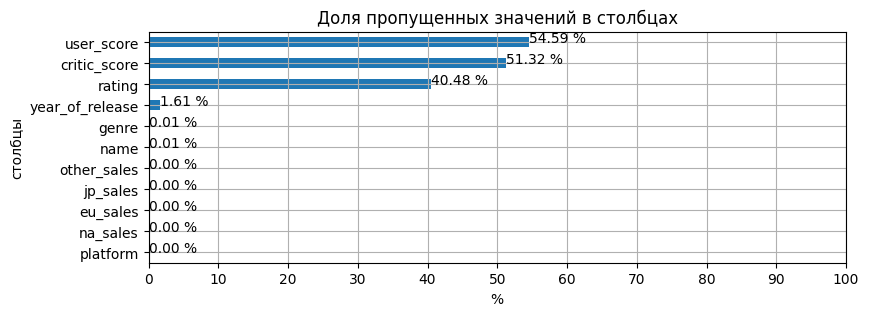

In [15]:
# доли пропущенных значений в столбцах таблицы
plot_missing_values(data)

Найдём матрицу корреляции пропущенных значений. Она показывает, насколько сильно присутствие или отсутствие значений в одном столбце влияет на присутствие или отсутствие значений в другом.

In [16]:
# матрица корреляции пропущенных значений
(data
 .loc[:, data.isna().any()]
 .isna()
 .corr()
)

,name,year_of_release,genre,critic_score,user_score,rating
name,1.000000,-0.001399,1.000000,0.010654,0.009977,0.013265
year_of_release,-0.001399,1.000000,-0.001399,-0.021924,-0.004633,-0.020232
genre,1.000000,-0.001399,1.000000,0.010654,0.009977,0.013265
critic_score,0.010654,-0.021924,0.010654,1.000000,0.798656,0.782945
user_score,0.009977,-0.004633,0.009977,0.798656,1.000000,0.731056
rating,0.013265,-0.020232,0.013265,0.782945,0.731056,1.000000


#### Название и жанр игры

Для столбцов `name` и `genre` коэффициент корреляции пропущенных значений равен 1. Это значит, пропуски в этих столбцах имеются в одних и тех же строках таблицы. Таких строки всего 2:

In [17]:
data.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Скорее всего, эти 2 строки относятся к одной и той же игре, потому что год выхода и платформа в них совпадают.

Можно предположить, что возможная причина появления этих пропусков - наличие нестандартных символов в названии игры, что вызвало ошибку при обработке данных или их выгрузке.

Возможная причина появления пропущенных значений жанра - игра не была классифицирована на принадлежность к одному из жанров, либо тоже ошибка при обработке данных, как в случае с названием.

Строк с пропусками названия и жанра всего две, обе относятся к 1993 году и не содержат информации о жанре и оценках критиков и пользователей. Поэтому они вряд ли будут полезны, и лучше их удалить.

In [18]:
# удаляем строки с пропусками в столбце 'name'
data = data.dropna(subset=['name'])

#### Год выпуска

Возможно, что год выпуска пропущен для старых игр. Посмотрим, для каких платформ выходили игры, у которых пропущен год выпуска.

In [19]:
# уникальные значения в столбце 'platform'
# для строк с пропусками в столбце 'year_of_release'
list_unique_values(data.query('year_of_release.isna()'), 'platform')

Уникальные значения в столбце 'platform':
['2600', '3DS', 'DS', 'GB', 'GBA', 'GC', 'N64', 'PC', 'PS', 'PS2', 'PS3', 'PSP', 'PSV', 'Wii', 'X360', 'XB']



Но нет, в списке платформ присутствуют как старые, так и относительно новые.

Можно попытаться заполнить пропущенные значения года, предположив, что год выпуска игры на разных платформах одинаков. Для проверки этой гипотезы подсчитаем количество игр, у которых больше одного уникального значения года выхода для разных платформ.

In [20]:
# выбираем столбцы 'name', 'platform', 'year_of_release',
# отбрасываем строки-дубликаты,
# отбираем строки без пропусков в столбце 'year_of_release',
# группируем по названию игры,
# считаем кол-во уникальных значений года выпуска для каждой игры,
# выводим кол-во игр, у которых кол-во уникальных значений > 1
(data[['name', 'platform', 'year_of_release']]
 .drop_duplicates()
 .query('year_of_release.notna()')
 .groupby('name')['year_of_release']
 .nunique().gt(1).sum()
)

694

Такие игры существуют, значит гипотеза не подтвердилась. Похоже, годы выпуска игры на разных платформах могут отличаться. Кроме того, может быть адаптация старых игр на новые платформы.

Корреляции появления пропущенных значений года с пропусками в других столбцах тоже нет, как видно из матрицы корреляции.

Причины пропусков значения года выпуска не ясны, возможно техническая ошибка при обработке даты. По названию игры можно найти информацию о годе её выпуска для каждой платформы. Пропущенные значения можно было бы заполнить по названию игры и платформы, используя сторонние источники данных, но это потребует значительных усилий.

#### Оценки критиков и пользователей

В столбцах `critic_score` и `user_score` доля пропусков превышает 50 %. Причина их появления, вероятно, в том, что далеко не все выходящие игры становятся популярными и получают оценки пользователей и критиков. 

На матрице корреляции пропущенных значений была видна довольно сильная корреляция пропусков в столбцах `critic_score` и `user_score`. Это тоже даёт основание предположить, что значения оценок отсутствуют для непопулярных игр.

In [21]:
# уникальные значения в столбце 'user_score'
list_unique_values(data, 'user_score')

Уникальные значения в столбце 'user_score':
[0.0, 0.2, 0.3, 0.5, 0.6, 0.7, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, nan]



В столбце `user_score` встречается значение `0`, которое может быть заполнителем пропусков. Но также встречаются другие значения в диапазоне от 0 до 1, поэтому нельзя считать значение `0` аномальным.

Оценки и критиков, и пользователей для одной и той же игры на разных платформах формируются независимо, поэтому заполнить пропущенные значения оценок, используя имеющиеся значения для других платформ, не получится.

#### Рейтинг ESRB

In [22]:
# уникальные значения в столбце 'rating'
list_unique_values(data, 'rating')

Уникальные значения в столбце 'rating':
['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan]



Доля пропущенных значений в столбце `rating` превышает 40 %.

Система рейтингов ESRB - добровольная, поэтому наиболее вероятная причина пропусков - издатель игры не предоставил её для оценки с целью присвоения рейтинга.

Система рейтингов ESRB была введена в 1994 году.  Поэтому можно предположить, что у игр, выпущенных до 1994, значения рейтинга пропущены. Проверим, что рейтинг ESRB стал присваиваться играм начиная с 1994 года.

In [23]:
# количество игр, выпущенных до 1994
len(data.query('year_of_release < 1994'))

365

In [24]:
# количество игр, выпущенных до 1994,
# у которых есть рейтинг ESRB
len(data.query('year_of_release < 1994 and rating.notna()'))

4

Из 367 игр, выпущенных ранее 1994 года, только 4 имеют рейтинг ESRB.

In [25]:
data.query('year_of_release < 1994 and rating.notna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2612,The 7th Guest,PC,1992.0,Adventure,0.02,0.77,0.0,0.00,NaN,NaN,T
14470,Alter Ego,PC,1985.0,Simulation,0.00,0.03,0.0,0.01,59.0,5.8,T
14610,Doom,PC,1992.0,Shooter,0.02,0.00,0.0,0.00,85.0,8.2,M
14621,SimCity,PC,1988.0,Simulation,0.00,0.02,0.0,0.01,64.0,2.2,E10+


Все эти 4 игры для PC. Возможно, рейтинг был им присвоен уже после 1994.

В период с 1994 по 1998 игры категории "E (Everyone) маркировались как "K-A" (Kids to Adults), т.е. эти значения - неявные дубликаты.

Маркировка "RP" (Rating Pending) означает, что игре ещё не был присвоен рейтинг, т.е. это заполнитель для пропущенных значений. 

Поэтому произведём обработку значений в этом столбце следующим образом:
- заменим значение `'K-A'` на `'E'`,
- заменим пропущенные значения на `'RP'`.

In [26]:
# в столбце 'rating'
# заменяем значения 'K-A' на 'E' и
# заполняем пропуски значением 'RP'
data['rating'] = (data['rating']
                  .replace('K-A', 'E')
                  .fillna('RP')
                 )

Проверим результат заполнения пропусков в столбцах таблицы.

In [27]:
# количество пропущенных значений в каждом столбце
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating                0
dtype: int64

#### Проверка на дубликаты

Найдём количество полных дубликатов строк таблицы.

In [28]:
# количество строк-дубликатов
data.duplicated().sum()

0

Полные дубликаты отсутствуют. Поищем возможные дубликаты по ключевым признакам - названию игры, платформе и году выпуска.

In [29]:
# количество строк-дубликатов
data.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

1

Обнаружены потенциальные дубликаты. Посмотрим на них.

In [30]:
# выводим все повторяющиеся строки
duplicates = (data[data.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)]
 .sort_values(by='name')
)
duplicates

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Также в данных могут быть потенциальные дубликаты с совпадающим названием и платформой, но с пропущенным значением года выпуска. Добавим их в таблицу дубликатов, попутно заполнив пропуски в значении года выпуска, если в группе с одинаковым названием и платформой все игры имеют один и тот же год выпуска.

In [31]:
# группируем данные по названию и платформе,
# если есть пропуски года и кол-во уникальных значений годе без учёта пропусков = 1,
# то заполняем пропуски года этим значением для группы в исходных данных,
# и присоединяем к таблице дубликатов
for group_name, group_data in data.groupby(['name', 'platform']):
    if (group_data['year_of_release'].hasnans 
        and group_data['year_of_release'].nunique() == 1
       ):
        year = group_data['year_of_release'].dropna().unique()[0]
        group_data.loc[group_data['year_of_release'].isna(), 'year_of_release'] = year
        data.loc[group_data.index , 'year_of_release'] = year
        duplicates = pd.concat([duplicates, group_data])
duplicates

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,2006.0,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+


Помимо ранее обнаруженных строк с отсутствующим названием, есть ещё две игры, для которых две записи. То, что это именно одни и те же игры, видно из совпадения оценок критиков и пользователей (столбцы `critic_score` и `user_score`). 

Объединим эти строки попарно, просуммировав продажи для каждого региона.

In [32]:
# группируем таблицу со строками-дубликатами по названию игры
# и в каждую из таких строк в исходной таблице записываем сумму 
# продаж по строкам-дубликатам для каждого региона
for group_name, group_data in duplicates.groupby('name'):
    data.loc[group_data.index, ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']] = (
        group_data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
        .sum()
        .values
    )

Проверим результат суммирования продаж. В результате строки должны стать полными дубликатами.

In [33]:
# повторяющиеся строки в таблице
data.loc[duplicates.index]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.23,0.00,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,2.11,0.23,0.00,0.23,83.0,5.5,E
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.54,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.54,0.04,0.66,43.0,4.1,E10+


Найдём теперь количество полных дубликатов.

In [34]:
# количество строк-дубликатов
data.duplicated().sum()

2

Удалим полные дубликаты из данных.

In [35]:
# удаляем полные дубликаты строк
data = data.drop_duplicates()

#### Год выпуска (продолжение)

Доля игр с пропущенными значениями года выпуска в общем объёме данных мала (≈1,6 %). А год выпуска игры является одним из ключевых параметров при дальнейшем анализе данных. Поэтому во избежание проблем со сходимостью суммы продаж по годам и общей суммы продаж лучше **удалить** записи с пропусками из данных.

Кроме того, удаление пропусков позволит привести тип данных в столбце `year_of_release` к целочисленному.

In [36]:
# удаляем строки с пропусками в столбце 'year_of_release'
data = data.dropna(subset=['year_of_release'])
# приводим значения в столбце к типу int
data['year_of_release'] = data['year_of_release'].astype(int)

Для проверки выведем снова общую информацию о данных.

In [37]:
# общая информация о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


#### Проверка на аномалии

Для проверки на наличие аномалий в столбцах с числовыми значениями рассмотрим статистические характеристики столбцов и построим гистограммы распределения значений в них.

In [38]:
# числовое описание данных
# округляем до 2 знаков после точки
# транспонируем таблицу для удобства
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
year_of_release,16443.0,2006.49,5.88,1980.0,2003.0,2007.00,2010.00,2016.00
na_sales,16443.0,0.26,0.82,0.0,0.0,0.08,0.24,41.36
eu_sales,16443.0,0.15,0.51,0.0,0.0,0.02,0.11,28.96
jp_sales,16443.0,0.08,0.31,0.0,0.0,0.00,0.04,10.22
other_sales,16443.0,0.05,0.19,0.0,0.0,0.01,0.03,10.57
critic_score,7982.0,68.99,13.92,13.0,60.0,71.00,79.00,98.00
user_score,7462.0,7.13,1.50,0.0,6.4,7.50,8.20,9.70


Видно, что значительная доля игр имеет низкие продажи, поскольку медиана и 3-й квартиль распределения намного ближе к минимуму, чем к максимуму.

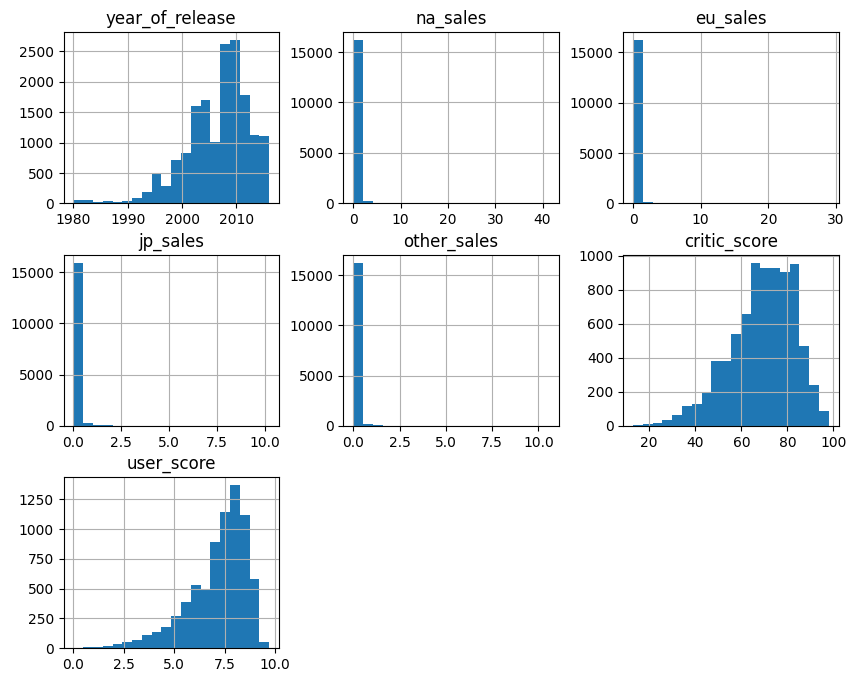

In [39]:
# строим гистограммы для всех числовых столбцов
data.hist(bins=20, figsize=(10, 8))
plt.show()

По гистограммам для столбцов со значениями продаж видно, что распределение продаж имеет длинный правый хвост. Это означает, что есть очень небольшое количество игр с высокими продажами, а основная масса игр имеет низкие продажи.

Аномалии, требующие исправления на этапе предобработки данных, отсутствуют.

### Подсчёт суммарных продаж

Подсчитаем суммарные продажи каждой игры во всех регионах и запишем их в новый столбец `total_sales`.

In [40]:
# суммируем столбцы 'na_sales', 'eu_sales', 'jp_sales', 'other_sales',
# результат записываем в столбец 'total_sales'
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

Проверим правильность суммирования продаж по первым строкам таблицы.

In [41]:
# первые 5 строк таблицы
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38


### Вывод

В данных присутствует информация об играх для 31 платформы, выпущенных за период с 1980 по 2016 год, принадлежащих к одному из 11 конкретных жанров либо к категории "прочие".

В результате **предобработки** данные подготовлены для анализа:
- **Названия столбцов** приведены к общепринятому стилю именования "snake_case" (только нижний регистр, слова разделены знаком подчёркивания).

   <br/> 
- Выполнено **преобразование типа данных**:
    - Данные в столбце `user_score` приведены к типу `float64`. Причина того, что в исходных данных этот столбец имел тип `object` - строковое значение `'tbd'` ("To Be Determined") в столбце, которое являлось заменителем пропущенных значений.
    - Данные в столбце `year_of_release` приведены к типу `int64` после удаления пропусков.
    - Столбец `critic_score` исходя из содержащихся в нём данных должен иметь тип `int64`, однако преобразование типа невозможно из-за наличия пропущенных значений, т.к. пропуски (значения `NaN`)  относятся к типу `float64`.

   <br/> 
- Проведён **анализ пропущенных значений**, в результате которого установлено:
    - Пропуски в столбцах `name` и `genre` имеются в одних и тех же строках. Таких строки всего 2, и скорее всего они относятся к одной и той же игре, потому что год выхода и платформа в них совпадают. 
    - Пропуски в столбце `name` полностью случайные. Возможная причина их появления - наличие нестандартных символов в названии игры, что вызвало ошибку при обработке данных или их выгрузке.
    - Пропуски в столбце `genre` случайные. Возможная причина их появления - игра не была классифицирована на принадлежность к одному из жанров.
    - Пропуски значений года выпуска игры в столбце `year_of_release` полностью случайные. Причины их появления не ясны, возможно техническая ошибка при обработке даты. 
    - Доля пропусков в столбцах `critic_score` и `user_score`  превышает 50 %, причём появление пропусков в этих столбцах довольно сильно коррелирует. Причина их появления, вероятно, в том, что далеко не все выходящие игры становятся популярными и получают оценки пользователей и критиков. 
    - Доля пропусков в столбце `rating` превышает 40 %. Возможная причина их появления - добровольность рейтинговой системы ESRB. Возможно, издатель игры не предоставил её для оценки с целью присвоения рейтинга. Кроме того, система рейтингов ESRB была введена в 1994 году, поэтому абсолютное большинство игр, выпущенных ранее, также не имеет рейтинга. Значение `'RP'` ("Rating Pending") означает, что игре ещё не был присвоен рейтинг, т.е. это заполнитель пропусков.

   <br/>     
- Предпринята попытка **заполнения пропущенных значений**:
    - Две строки с пропущенным названием в столбце `name` и жанром игры в столбце `genre` **удалены**.
    - Пропущенные значения года выпуска игры в столбце `year_of_release` **можно было бы заполнить** по названию игры и платформы, используя сторонние источники данных, но это потребует значительных усилий. 
    - Пропуски в значении года выпуска **заполнены** для обнаруженных вероятных дубликатов, если в группе дубликатов с совпадающим названием и платформой все игры имеют один и тот же год выпуска. 
    - Год выпуска игры является одним из ключевых параметров при дальнейшем анализе данных. Во избежание проблем со сходимостью суммы продаж по годам и общей суммы продаж оставшиеся строки с пропусками **удалены**, поскольку их доля в общем объёме данных мала (≈1,6 %).
     - Пропущенные значения оценок критиков и пользователей в столбцах `critic_score` и `user_score` **оставлены**. Попытка заполнения пропусков привела бы к искажению статистики из-за их большой доли в данных. Оценки и критиков, и пользователей для одной и той же игры на разных платформах формируются независимо, поэтому заполнить пропущенные значения оценок, используя имеющиеся значения для других платформ, не получится.
    - Пропущенные значения рейтинга ESRB в столбце `rating` **заполнены** значением-заполнителем `'RP'`.

   <br/>     
- Проведена **проверка на дубликаты** и их устранение:
    - Полные дубликаты не обнаружены.
    - Обнаружены вероятные дубликаты с совпадающими ключевыми признаками (название игры, платформа, год выпуска, оценки критиков и пользователей). Эти строки были объединены с суммированием продаж для каждого региона.
    - Обнаружены неявные дубликаты значений рейтинга ESRB в столбце `rating`. В период с 1994 по 1998 игры категории "E (Everyone) маркировались как "K-A" (Kids to Adults), т.е. эти значения - неявные дубликаты. Значения `'K-A'` были заменены на `'E'`.

   <br/> 
- Проведена **проверка на аномалии** в данных. Аномалии, требующие исправления на этапе предобработки данных, не обнаружены.
    - По гистограммам для столбцов со значениями продаж видно, что распределение продаж имеет длинный правый хвост. Это означает, что есть очень небольшое количество игр с высокими продажами, а основная масса игр имеет низкие продажи.

   <br/> 
- Величина **суммарных продаж** каждой игры во всём мире записана в новый столбец `total_sales`.

## Исследовательский анализ данных

При проведении исследовательского анализа данных для вывода параметров распределения значений в столбцах будет полезна функция `column_stat(data, columns)`:

In [42]:
def column_stat(data, columns=None):
    """
    Возвращает параметры распределения значений в столбцах: 
    кол-во объектов, минимум, среднее, медиана, максимум.
    """
    # если объект Series, то преобразуем его в DataFrame
    if isinstance(data, pd.Series):
        data = data.to_frame()
        
    if columns is None:
        columns = data.columns
    stat = (data[columns]
            .agg(['count', 'min', 'mean', 'std', 'median', 'max'])
            .round(2)
           )
    # если объект Series, то преобразуем его в DataFrame
    if isinstance(stat, pd.Series):
        stat = stat.to_frame()
    # транспонируем
    stat = stat.T
    # количество - всегда целое число
    stat['count'] = stat['count'].astype(int, errors='ignore')
    # название индекса
    stat.index.name = 'column'
    
    return stat

Для расчёта доли в процентах от суммы значений в столбце будет полезна функция `to_percent()`:

In [43]:
def to_percent(ser):
    """
    Возвращает долю (в процентах) от суммы значений в столбце.
    """
    return ser / ser.sum() * 100

Для построения круговых диаграмм с группировкой мелких долей будет полезна функция `plot_pie()`:

In [44]:
def plot_pie(data_column, limit=None, ax=None):
    """
    Строит круговую диаграмму для столбца с группировкой мелких долей, кроме 
    заданного числа 'limit' крупных.
    """
    # готовим данные для диаграммы
    plot_data = data_column.sort_values(ascending=False)
    # объединяем мелкие доли
    if (limit is not None) and (len(data_column) > limit):
        top_shares_index = plot_data.head(limit).index
        small_shares = data_column.index.drop(top_shares_index)
        plot_data.loc['другие'] = plot_data.loc[small_shares].sum(axis=0)
        plot_data = plot_data.drop(small_shares)
    
    if ax is None:
            fig, ax = plt.subplots()
            
    # строим и оформляем круговую диаграмму
    plot_data.plot.pie(ax=ax, figsize=(5, 5), startangle=180, 
                       autopct='%.1f%%', pctdistance=0.8,
                       counterclock=False, legend=False)
    ax.set_ylabel('')
    
    return ax

### Распределение игр по году выпуска

Построим график распределения игр по году выпуска в диапазоне от минимального до максимального значения.

In [45]:
# характеристики распределения значений в столбце
column_stat(data, 'year_of_release')

,count,min,mean,std,median,max
column,,,,,,
year_of_release,16443,1980.0,2006.49,5.88,2007.0,2016.0


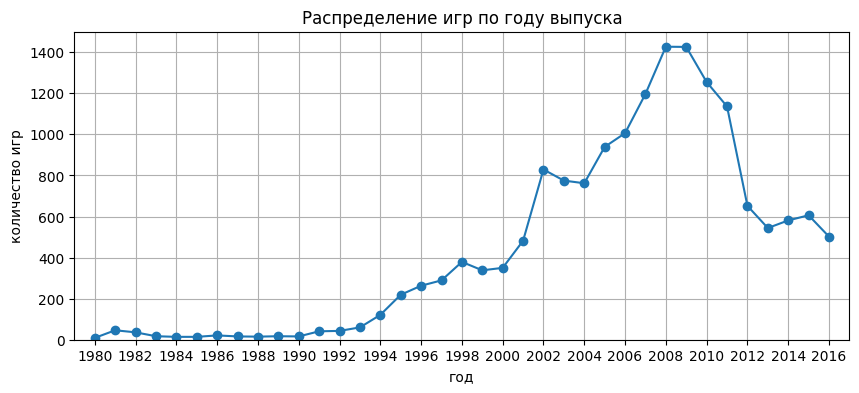

In [46]:
(data
 # формируем сводную таблицу по годам
 .pivot_table(
     index='year_of_release',
     values='name',
     aggfunc='count',
     fill_value=0,
 )
 # строим график
 .plot(style='o-', figsize=(10, 4), grid=True, legend=False)
)
plt.ylim(0, 1500)
plt.xlim((1979, 2017))
plt.xticks(range(1980, 2017, 2))
plt.title('Распределение игр по году выпуска')
plt.xlabel('год')
plt.ylabel('количество игр')
plt.show()

Если объединить версии одной и той же игры для разных платформ, то распределение немного изменится, но в целом его вид будет похожим.

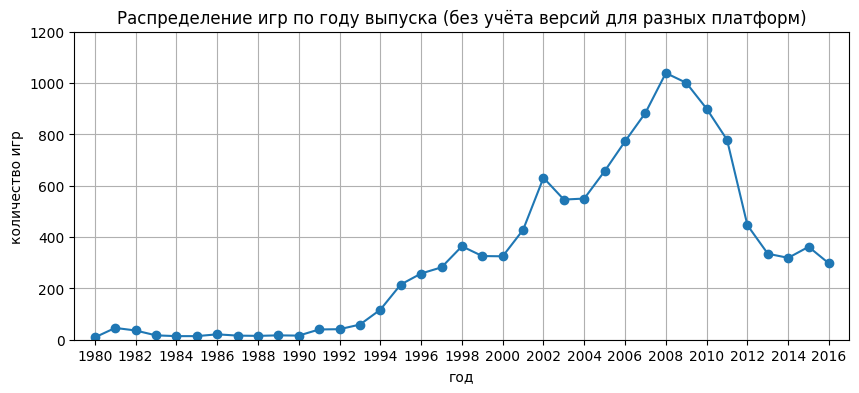

In [47]:
(data
 # отбрасываем лишние дубликаты с одинаковыми названием и годом выпуска
 .drop_duplicates(subset=['name', 'year_of_release'])
 # формируем сводную таблицу по годам
 .pivot_table(
     index='year_of_release',
     values='name',
     aggfunc='count',
     fill_value=0,
 )
 # строим график
 .plot(style='o-', figsize=(10, 4), grid=True, legend=False)
)
plt.ylim(0, 1200)
plt.xlim((1979, 2017))
plt.xticks(range(1980, 2017, 2))
plt.title('Распределение игр по году выпуска (без учёта версий для разных платформ)')
plt.xlabel('год')
plt.ylabel('количество игр')
plt.show()

По графику видно, что игр, выпущенных в 1980-е годы, мало. Заметный рост количества выпущенных игр наблюдается только с 1994 года. К тому же данные по играм для платформ, популярных в 1980-е и начале 1990-х, вряд ли помогут построить прогноз на 2017 год.

Поэтому далее будем рассматривать только игры, выпущенные не ранее 1994 года.

Также заметно резкое снижение количества выпускаемых игр, начиная с 2012 года. Вероятно, это связано с ростом популярности игр для смартфонов, что привело к смещению фокуса разработчиков игр на платформы Android и iPhone, которые не представлены в имеющихся данных.

In [48]:
# оставляем данные только начиная с 1994 года
data = data.query('year_of_release >= 1994')

### Платформы с наибольшими суммарными продажами

Определим платформы с наибольшими суммарными продажами.

In [49]:
# формируем сводную таблицу
platform_top = (data
 .pivot_table(
     index='platform',
     values='total_sales',
     aggfunc='sum'
 )
 # сортируем по убыванию продаж
 .sort_values('total_sales', ascending=False)
)
platform_top

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.82
Wii,891.18
DS,802.76
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Визуализируем данные в сводной таблице, построив график распределения суммарных продаж по платформам.

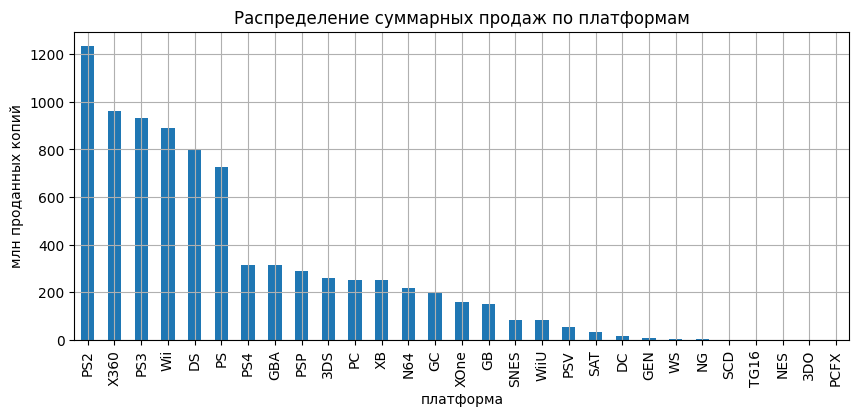

In [50]:
# строим график
platform_top.plot.bar(figsize=(10, 4), grid=True, legend=False)
plt.title('Распределение суммарных продаж по платформам')
plt.xlabel('платформа')
plt.ylabel('млн проданных копий')
plt.show()

Видно, что по суммарным продажам за период начиная с 1994 года доминируют шесть основных платформ с наибольшими суммарными продажами. Между этими шестью платформами и остальными наблюдается резкий разрыв более чем на 400 млн проданных копий.

Выделим платформы с наибольшими суммарными продажами и для них рассмотрим динамику суммарных продаж по годам.

In [51]:
# список платформ с наибольшими суммарными продажами (более 500 млн копий)
top_platforms = (platform_top
                 .query('total_sales > 500')
                 .index
                 .tolist()
                )
top_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

In [52]:
# формируем сводную таблицу
top_platform_sales = (
    data
    .query('platform in @top_platforms')
    .pivot_table(
         index='year_of_release',
         columns='platform',
         values='total_sales',
         aggfunc='sum',
     )
)
top_platform_sales

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1994,NaN,6.03,NaN,NaN,NaN,NaN
1995,NaN,35.96,NaN,NaN,NaN,NaN
1996,NaN,94.70,NaN,NaN,NaN,NaN
1997,NaN,136.17,NaN,NaN,NaN,NaN
1998,NaN,169.49,NaN,NaN,NaN,NaN
1999,NaN,144.53,NaN,NaN,NaN,NaN
2000,NaN,96.37,39.17,NaN,NaN,NaN
2001,NaN,35.59,166.43,NaN,NaN,NaN
2002,NaN,6.67,205.38,NaN,NaN,NaN


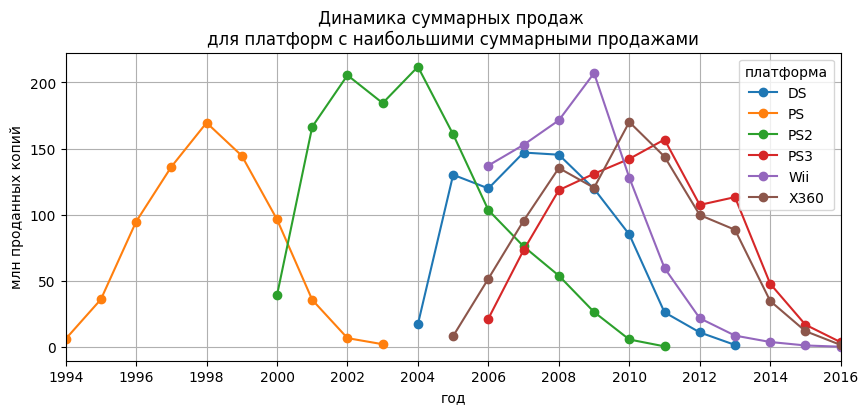

In [53]:
# строим графики
(top_platform_sales
 #.fillna(0)
 .plot(style='o-', figsize=(10, 4), grid=True)
)
plt.xlim((1994, 2016))
plt.xticks(range(1994, 2018, 2))
plt.title('Динамика суммарных продаж \nдля платформ с наибольшими суммарными продажами')
plt.xlabel('год')
plt.ylabel('млн проданных копий')
plt.legend(title='платформа')
plt.show()

Из графиков видно:
- Новые успешные платформы появляются примерно каждые 5 лет.
- Зависимость продаж от времени для всех успешных платформ имеет похожий вид: сначала рост продаж, а затем спад.

Период от начала продаж игр для конкретной платформы до их прекращения определяет **срок жизни** данной платформы. Платформа является актуальной и потенциально прибыльной, когда она находится в стадии высоких продаж, который составляет приблизительно половину от всего срока жизни платформы.

Найдём срок жизни для каждой из платформ с наибольшими суммарными продажами и его среднее значение.

In [54]:
# количество лет, в которые имеются продажи для данной платформы,
# сортируем по возрастанию
top_platforms_life = (
    top_platform_sales
     .count()
     .sort_values()
     .to_frame()
     .rename(columns={0: 'срок жизни (лет)'})
)
display(top_platforms_life)
print(f'Среднее значение: {top_platforms_life.mean().item():.1f}')

,срок жизни (лет)
platform,
DS,10
PS,10
PS3,11
Wii,11
PS2,12
X360,12


Среднее значение: 11.0


Срок жизни платформ с наибольшими суммарными продажами довольно близок - от 10 до 12 лет. Средний срок жизни для платформ с наибольшими суммарными продажами составляет 11 лет.

Примерная длительность периода популярности платформы - половина этого значения, т.е 5,5 лет.

### Выбор актуального периода выхода игр

Длительность периода актуальности платформ можно оценивать по-разному, например:
- как длительность периода, в котором продажи превышают некоторое значение,
- как длительность периода от начала продаж до достижения максимума продаж.

Сравним результаты этих двух оценок.

In [55]:
# количество лет, в которые продажи для данной платформы превышают 75 млн копий,
# сортируем по возрастанию
top_platforms_life = (
    top_platform_sales
     .gt(75)
     .sum()
     .sort_values()
     .to_frame()
     .rename(columns={0: 'период больших продаж (лет)'})
)
display(top_platforms_life)
print(f'Среднее значение: {top_platforms_life.mean().item():.1f}')

,период больших продаж (лет)
platform,
PS,5
Wii,5
DS,6
PS3,6
PS2,7
X360,7


Среднее значение: 6.0


In [56]:
# количество лет от начала продаж до достижения максимума продаж для данной платформы,
# сортируем по возрастанию
top_platforms_life = (top_platform_sales
 .apply(lambda x: x.idxmax() - x.first_valid_index())
 .sort_values()
 .to_frame()
 .rename(columns={0: 'срок от начала до максимума продаж (лет)'})
)
display(top_platforms_life)
print(f'Среднее значение: {top_platforms_life.mean().item():.1f}')

,срок от начала до максимума продаж (лет)
platform,
DS,3
Wii,3
PS,4
PS2,4
PS3,5
X360,5


Среднее значение: 4.0


Оценки дают близкие значения 4-6 лет. 

Учёт обнаруженного факта падения продаж игр для игровых платформ с 2012 года в связи с ростом популярности игр для смартфонов тоже приводит к оценке периода актуальности в 5 лет (2012-2016) для построения прогноза на 2017 год.

Таким образом, в качестве **актуального периода** выхода игр для дальнейшего анализа выберем период **5 лет** с 2012 по 2016 год. Данные за предыдущие годы учитывать далее не будем.

In [57]:
# выбираем данные за актуальный период
data_new = data.query('year_of_release >= 2012')

In [58]:
# общая информация о таблице
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2885 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2885 non-null   object 
 1   platform         2885 non-null   object 
 2   year_of_release  2885 non-null   int64  
 3   genre            2885 non-null   object 
 4   na_sales         2885 non-null   float64
 5   eu_sales         2885 non-null   float64
 6   jp_sales         2885 non-null   float64
 7   other_sales      2885 non-null   float64
 8   critic_score     1311 non-null   float64
 9   user_score       1530 non-null   float64
 10  rating           2885 non-null   object 
 11  total_sales      2885 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 293.0+ KB


### Динамика продаж по платформам

Рассмотрим динамику суммарных продаж игр для разных платформ по годам.

In [59]:
# формируем сводную таблицу
platform_sales = (
    data_new
    .pivot_table(
         index='platform',
         columns='year_of_release',
         values='total_sales',
         aggfunc='sum',
         margins=True,
     )
    .drop('All')
    .rename(columns={'All': 'total_sales'})
    .sort_values(by='total_sales', ascending=False)
)
platform_sales

year_of_release,2012,2013,2014,2015,2016,total_sales
platform,,,,,,
PS4,NaN,25.99,100.00,118.90,69.25,314.14
PS3,107.36,113.25,47.76,16.82,3.60,288.79
X360,99.74,88.58,34.74,11.96,1.52,236.54
3DS,51.36,56.57,43.76,27.78,15.14,194.61
XOne,NaN,18.96,54.07,60.14,26.15,159.32
WiiU,17.56,21.65,22.03,16.35,4.60,82.19
PC,23.22,12.38,13.28,8.52,5.25,62.65
PSV,16.19,10.59,11.90,6.25,4.25,49.18
Wii,21.71,8.59,3.75,1.14,0.18,35.37


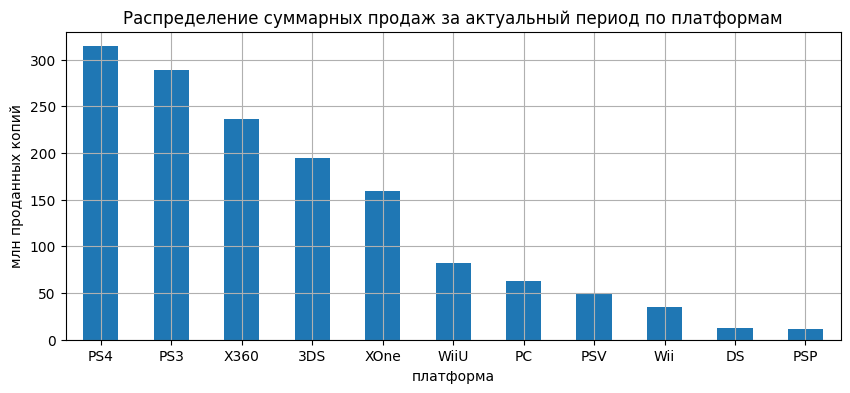

In [60]:
# строим график
platform_sales.plot.bar(y='total_sales', figsize=(10, 4), 
                        rot=0, grid=True, legend=False)
plt.title('Распределение суммарных продаж за актуальный период по платформам')
plt.xlabel('платформа')
plt.ylabel('млн проданных копий')
plt.show()

Топ-5 лидеров по суммарным продажам за актуальный период:

In [61]:
# выводим топ-5 платформ по суммарным продажам за актуальный период
platform_sales_top = (
    platform_sales
    ['total_sales']
    .head()
    .to_frame()
)
platform_sales_top

,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32


Распределение доли платформ в суммарных продажах за актуальный период визуализируем с помощью круговой диаграммы.

Покажем на круговой диаграмме доли топ-5 платформ, объединив доли остальных.

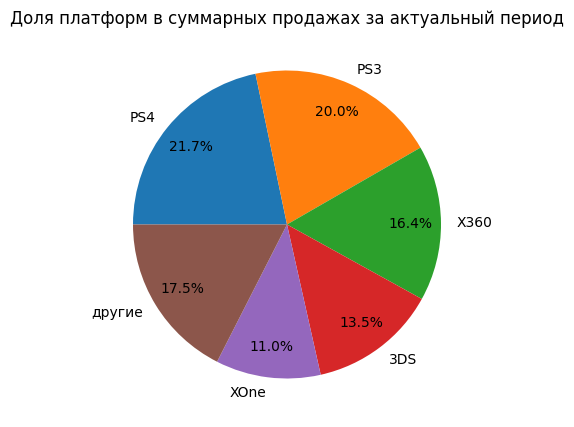

In [62]:
# строим круговую диаграмму с группировкой мелких долей
ax = plot_pie(platform_sales['total_sales'], limit=5)
ax.set_title('Доля платформ в суммарных продажах за актуальный период');

In [63]:
# доля продаж топ-5 платформ
print(f"{platform_sales_top['total_sales'].sum() / platform_sales['total_sales'].sum():.2%}")

82.50%


Суммарная доля продаж игр для пяти наиболее популярных платформ (PS4, PS3, X360, 3DS, XOne) составляет 82,5 %.

Построим график, который покажет динамику изменения продаж по платформам.

year_of_release,2012,2013,2014,2015,2016
platform,,,,,
PS4,NaN,25.99,100.00,118.90,69.25
XOne,NaN,18.96,54.07,60.14,26.15
3DS,51.36,56.57,43.76,27.78,15.14
PC,23.22,12.38,13.28,8.52,5.25
WiiU,17.56,21.65,22.03,16.35,4.60
PSV,16.19,10.59,11.90,6.25,4.25
PS3,107.36,113.25,47.76,16.82,3.60
X360,99.74,88.58,34.74,11.96,1.52
Wii,21.71,8.59,3.75,1.14,0.18


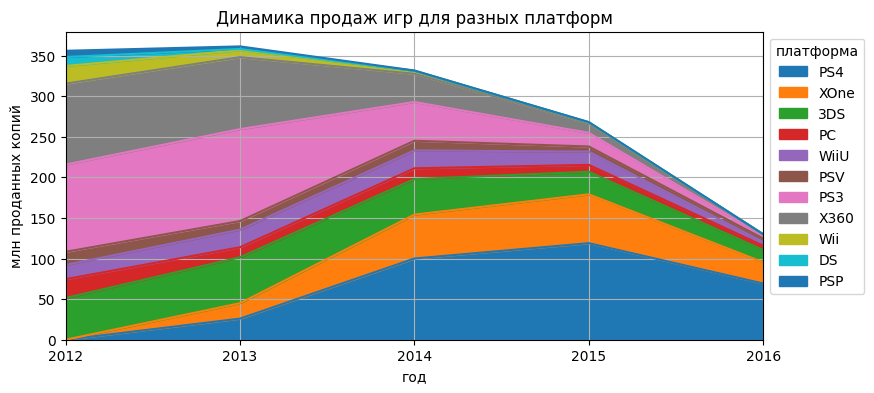

In [64]:
# готовим данные
plot_data = (
    platform_sales
    .drop('total_sales', axis=1)
    .sort_values(by=2016, ascending=False)
)
# выводим таблицу
display(plot_data)
# строим и оформляем график
plot_data.T.plot.area(figsize=(9, 4), grid=True)
plt.xlim((2012, 2016))
plt.xticks(range(2012, 2017))
plt.title('Динамика продаж игр для разных платформ')
plt.xlabel('год')
plt.ylabel('млн проданных копий')
plt.legend(title='платформа', bbox_to_anchor=(1, 1))
plt.show()

В актуальном периоде с 2012 года игры выпускались для 11 платформ. Причём общие продажи игр с 2012 по 2015 год снижались (за 2016 год данные могут быть неполными).

Видно, что на фоне снижения суммарных продаж игр за рассматриваемый период, для отдельных платформ наблюдается рост продаж.

За рассматриваемый период 2012-2016 г. произошла смена лидирующих по продажам платформ. Если в 2012 году основная часть продаж игр приходилась на платформы PS3 и X360, то с появлением в 2013 году платформ следующего поколения PS4 и XOne происходит перераспределение продаж в их пользу. В результате по итогам 2015 года лидерами по продажам были PS4 и XOne, а продажи игр для платформ предыдущего поколения PS3 и X360 сильно упали, хотя и превышают продажи игр для PC.

Таким образом, к **растущим платформам** относятся PS4 и XOne. Продажи для конкурирующей с ними платформы WiiU только достигли максимума в 2014 и перешли к снижению, однако остаются стабильными.

Продажи игр для PC тоже падают, однако это происходит плавно. Причина в том, что платформа PC занимает особое положение в связи с тем, что здесь не происходит смены поколений.

Продажи игр для портативной платформы 3DS, занимающей 3-е место по продажам в 2015-2016, достигли пика в 2013 году и с тех пор снижаются. В 2015 произошло резкое снижение продаж для платформы.

Другая портативная игровая платформа актуального поколения PSV также показывает резкий спад продаж в 2015 году.

Причина падения продаж игр для портативных платформ очевидна - это взлёт популярности смартфонов в качестве игровых платформ в связи с ростом их производительности.

Все платформы предыдущего поколения (PS3, X360, Wii, DS, PSP) демонстрируют падение продаж. Причём продажи для платформы DS прекратились в 2014 году, а для PSP тоже близки к этому.

### Выбор потенциально прибыльных платформ

Чтобы выбрать потенциально прибыльные платформы на фоне общего снижения продаж игр, рассмотрим **динамику долей рынка** по платформам.

year_of_release,2012,2013,2014,2015,2016
platform,,,,,
PS4,0.00,7.19,30.16,44.37,53.29
XOne,0.00,5.25,16.31,22.44,20.12
3DS,14.43,15.66,13.20,10.37,11.65
PC,6.53,3.43,4.01,3.18,4.04
WiiU,4.93,5.99,6.64,6.10,3.54
PSV,4.55,2.93,3.59,2.33,3.27
PS3,30.17,31.35,14.41,6.28,2.77
X360,28.03,24.52,10.48,4.46,1.17
Wii,6.10,2.38,1.13,0.43,0.14


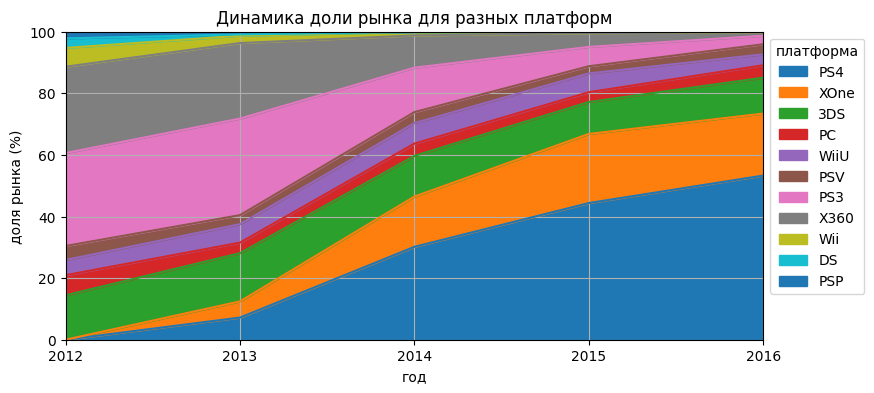

In [65]:
# готовим данные
plot_data = (platform_sales
 .drop('total_sales', axis=1)
 .transform(to_percent)
 .sort_values(by=2016, ascending=False)
)
# выводим таблицу
display(plot_data.fillna(0).round(2))
# строим и оформляем график
plot_data.T.plot.area(figsize=(9, 4), grid=True)
plt.ylim(0, 100)
plt.xlim((2012, 2016))
plt.xticks(range(2012, 2017))
plt.title('Динамика доли рынка для разных платформ')
plt.xlabel('год')
plt.ylabel('доля рынка (%)')
plt.legend(title='платформа', bbox_to_anchor=(1, 1))
plt.show()

Из графика видно:
- Для платформ PS4 и XOne доля рынка уверенно растёт. Для конкурирующей с ними платформы WiiU доля рынка медленно росла до 2014 года, а затем перешла к медленному снижению.
- Доли рынка портативных игровых платформ актуального поколения 3DS и PSV в среднем за рассматриваемый период постепенно снижаются.
- Доля рынка платформы PC невелика, но относительно стабильна.
- Доли рынка платформ предыдущего поколения (PS3, X360, Wii, DS, PSP) быстро падают.

Таким образом, в качестве **потенциально прибыльных платформ на 2017 год** уверенно можно выделить растущих лидеров рынка - **платформы PS4 и XOne**.

Перспективы роста платформы WiiU сомнительны по причине конкуренции с лидерами рынка.

Портативные игровые платформы испытывают сильное давление со стороны смартфонов, поэтому следует ожидать дальнейшего падения продаж игр для них. Тем не менее, пока продажи для платформы 3DS в 3 раза превышают продажи игр для PC.

Рынок игр для PC относительно стабилен, но его доля мала (3-4 %).

### Сравнение продаж игр для разных платформ

Чтобы сравнить характер распределения продаж игр для разных платформ, построим диаграммы размаха («ящик с усами») для глобальных продаж игр в разбивке по платформам.

In [66]:
# характеристики распределения значений в столбце
column_stat(data_new, 'total_sales')

,count,min,mean,std,median,max
column,,,,,,
total_sales,2885,0.01,0.5,1.25,0.12,21.05


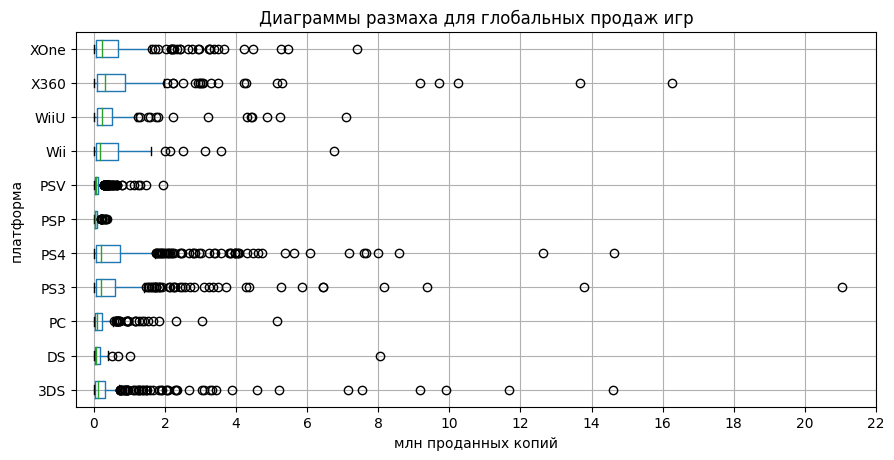

In [67]:
# строим диаграммы размаха
data_new.boxplot('total_sales', by='platform', figsize=(10, 5), vert=False)
plt.xlim((-0.5, 22))
plt.xticks(range(0, 23, 2))
plt.suptitle('')
plt.title('Диаграммы размаха для глобальных продаж игр')
plt.xlabel('млн проданных копий')
plt.ylabel('платформа')
plt.show()

Из диаграммы видно, что для всех платформ большинство игр имеет относительно невысокие продажи. Но отдельные игры становятся хитами и их продажи могут значительно, даже в 10-100 раз, превышать типичный (медианный) уровень продаж. На диаграмме такие игры показаны как выбросы - отдельными кружочками.

Прослеживается закономерность, что для портативных игровых платформ PSV и PSP хитов продаж меньше, для стационарных консолей. Отсутствие хитов на платформе PSP можно объяснить тем, что эта платформа находится в конце жизненного цикла и успешные игры для неё остались в прошлом. С другой стороны, на тоже портативных DS и 3DS существуют заметно выделяющиеся в продажах успешные игры. 

Количество игр, ставших хитами и имеющих огромные продажи, невелико - для каждой платформы в среднем всего несколько штук. 

Чтобы лучше рассмотреть основную часть распределения, построим фрагмент диаграммы в области невысоких продаж.

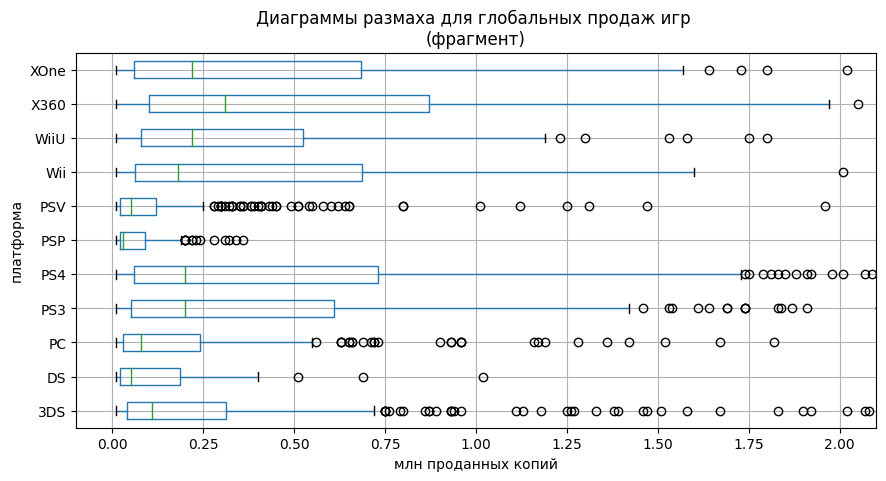

In [68]:
# строим диаграммы размаха
data_new.boxplot('total_sales', by='platform', figsize=(10, 5), vert=False)
plt.xlim((-0.1, 2.1))
plt.suptitle('')
plt.title('Диаграммы размаха для глобальных продаж игр \n(фрагмент)')
plt.xlabel('млн проданных копий')
plt.ylabel('платформа')
plt.show()

Можно заметить, что медианный уровень продаж и межквартильный размах для стационарных платформ (XOne, X360, PS4, PS3, WiiU, Wii) больше, чем для портативных (PSV, PSP, DS, 3DS).

Это означает, что в целом **игры для стационарных консолей имеют более высокие продажи**, а также более высокую долю успешных в продажах игр. Больший разброс объясняется более высоким разнообразием игр на данных платформах.

Для PC медианные продажи тоже меньше, чем для стационарных консолей.

Сделанные наблюдения подтверждают правильность выбора в качестве перспективных потенциально прибыльных платформ стационарных игровых консолей актуального поколения - платформ PS4 и XOne.

### Влияние на продажи отзывов пользователей и критиков

Рассмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Выберем для этого платформу PS4 как растущую и самую успешную по продажам игр в 2014-2016 годах.

In [69]:
# выделяем данные по платформе PS4
data_ps4 = data_new.query('platform == "PS4"')

Исследуем совместное распределение суммарных продаж игр и их оценок критиками и пользователями. Для этого построим диаграммы рассеяния и найдём коэффициенты корреляции для суммарных продаж, оценок критиков и пользователей.

Код для построения диаграмм рассеяния и вывода матрицы корреляции оформим в виде функции `sales_vs_ratings()` для удобства повторного использования с разными наборами данных.

In [70]:
def sales_vs_ratings(data, ymax=None, title='Влияние оценок на продажи игр'):
    """
    Строит диаграммы рассеяния в заданном диапазоне значений продаж
    для оценки критиков и суммарных продаж, для оценки пользователей и суммарных продаж,
    а также выводит для них матрицу коэффициентов корреляции.
    """
    # создаём область построения
    fig, ax = plt.subplots(1, 2)
    
    if ymax is None:
        ymax = np.ceil(
                data
                .query('critic_score.notna() or user_score.notna()')
                ['total_sales']
                .max()
        )
    # отзывы критиков:
    # строим диаграмму рассеяния
    (data
     .plot.scatter(x='critic_score', y='total_sales', ax=ax[0], color='C0',
                   xlim=(0, 100), ylim=(0, ymax),
                   xlabel='оценка критиков', ylabel='млн проданных копий',
                   alpha=0.5, grid=True, figsize=(11, 5)
                  )
    )
    # отзывы пользователей:
    # строим диаграмму рассеяния
    (data
     .plot.scatter(x='user_score', y='total_sales', ax=ax[1], color='C1',
                   xlim=(0, 10), ylim=(0, ymax),
                   xlabel='оценка пользователей', ylabel='млн проданных копий',
                   alpha=0.5, grid=True, figsize=(11, 5)
                  )
    )
    fig.suptitle(title)
    ax[0].set_title('Влияние оценки критиков')
    ax[1].set_title('Влияние оценки пользователей')
    plt.show()
    
    # выводим матрицу корреляции столбцов
    print('Матрица корреляции столбцов:')
    display(
        data[['critic_score', 'user_score', 'total_sales']]
        .corr()
        .round(2)
    )

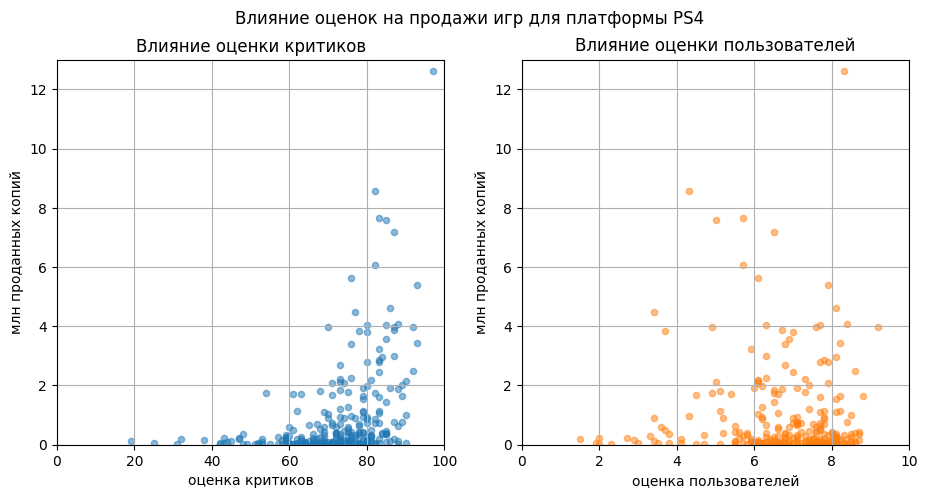

Матрица корреляции столбцов:


,critic_score,user_score,total_sales
critic_score,1.00,0.56,0.41
user_score,0.56,1.00,-0.03
total_sales,0.41,-0.03,1.00


In [71]:
# строим диаграммы рассеяния и выводим матрицу корреляции
sales_vs_ratings(data_ps4, title='Влияние оценок на продажи игр для платформы PS4')

По диаграммам рассеяния видно, что для игр с более высокими продажами оценки критиков в среднем более высокие и их разброс уменьшается. Оценки пользователей при этом могут быть средними. В целом оценки пользователей для успешных игр ниже, чем оценки критиков, и разброс их больше.

Игры, получившие низкую оценку от критиков (меньше 50/100), имеют более низкие продажи. В то же время игры, получившие высокую оценку (больше 80/100) от критиков, не обязательно будут иметь высокие продажи. Значительно количество игр, получивших высокие оценки от критиков и пользователей, но провалившихся в продажах. Причём этот факт сильнее заметен по оценкам пользователей: бóльшая часть высоко оценённых ими игр имеет низкие продажи.

Выделяется одна игра, сверхуспешная в продажах и получившая высокие оценки и от критиков, и от пользователей. Выясним её название.

In [72]:
# выбираем игры с суммарными продажами более 10 млн копий
data_ps4.query('total_sales > 10')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


Это оказалась игра "Grand Theft Auto V". Одновременно выяснилось, что есть одна игра с ещё большими продажами - "Call of Duty: Black Ops 3", для которой, однако, оценки не указаны.

**Матрица корреляции** подтверждает наблюдения, сделанные по диаграммам рассеяния.

Существует слабая положительная корреляция между оценкой критиков и продажами игры, на что указывает значение коэффициента корреляции 0.4. Это было видно на диаграмме рассеяния.

Между оценкой пользователей и продажами игры корреляция отсутствует. Значение коэффициента корреляции близко к нулю.

Существует положительная корреляция оценок критиков и пользователей. Значение коэффициента корреляции 0.56 говорит о наличии связи, однако не очень сильной. Построим диаграмму рассеяния для совместного распределения оценок критиков и пользователей, чтобы увидеть, как они коррелируют между собой.

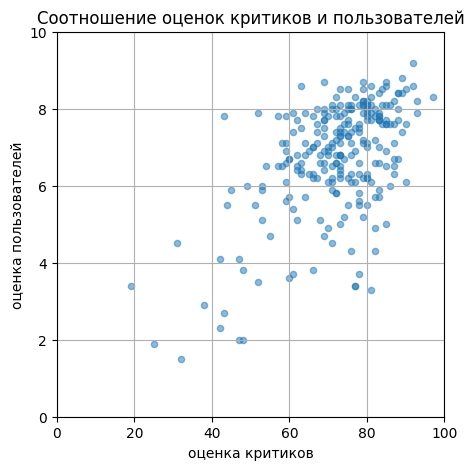

In [73]:
# строим диаграммы рассеяния
# в заданном диапазоне значений
(data_ps4
 .plot.scatter(x='critic_score', y='user_score',
               xlim=(0, 100), ylim=(0, 10),
               xlabel='оценка критиков', ylabel='оценка пользователей',
               alpha=0.5, grid=True, figsize=(5, 5)
              )
)
plt.title('Соотношение оценок критиков и пользователей')
plt.show()

Положительная корреляция оценок критиков и пользователей заметна, но разброс довольно большой. 

Таким образом, у игр, получивших низкую оценку от критиков, практически нет шансов стать успешными в продажах. В оценках пользователей эта закономерность практически не выражена. Поэтому при выборе потенциально успешной игры для продвижения в рекламной кампании **предпочтительнее ориентироваться на оценку критиков**. Высокая оценка от критиков означает, что у игры есть шансы на успех в продажах. А если оценка критиков низкая, то от продвижения такой игры лучше отказаться.

Проверим, не отличается ли характер связи оценок критиков и пользователей с продажами для других платформ. Для этого рассмотрим ещё несколько платформ, популярных в 2015 году - последнем году актуального периода, за который имеются полные данные о продажах.

In [74]:
# формируем список платформ для анализа
more_platforms = (
    platform_sales
    .sort_values(by=2015, ascending=False)
    .head(6)
    # удаляем из списка уже рассмотренную платформу PS4
    .drop(['PS4'], errors='ignore')
    .index
    .tolist()
)
more_platforms

['XOne', '3DS', 'PS3', 'WiiU', 'X360']

1. Платформа XOne:


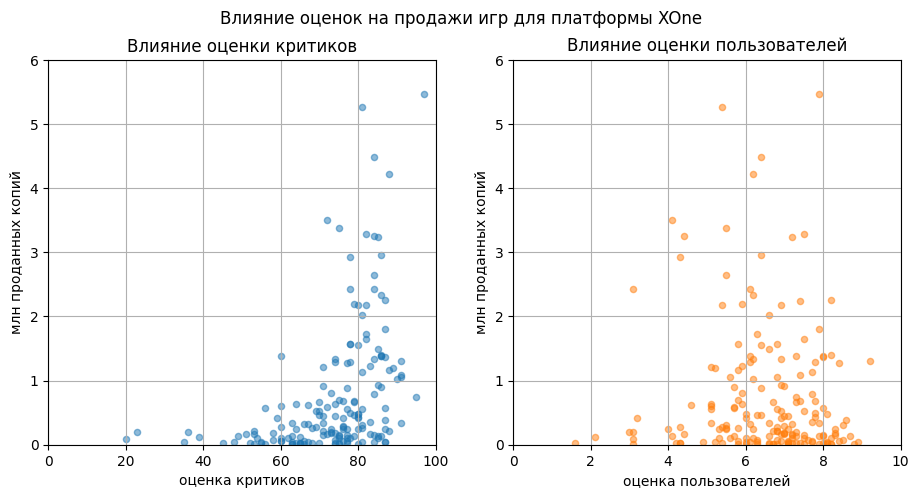

Матрица корреляции столбцов:


,critic_score,user_score,total_sales
critic_score,1.00,0.47,0.42
user_score,0.47,1.00,-0.07
total_sales,0.42,-0.07,1.00



2. Платформа 3DS:


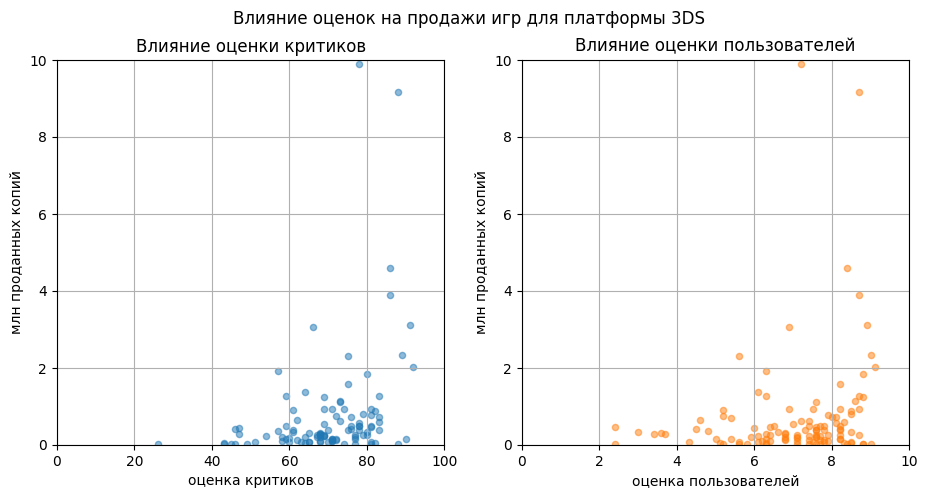

Матрица корреляции столбцов:


,critic_score,user_score,total_sales
critic_score,1.00,0.72,0.32
user_score,0.72,1.00,0.20
total_sales,0.32,0.20,1.00



3. Платформа PS3:


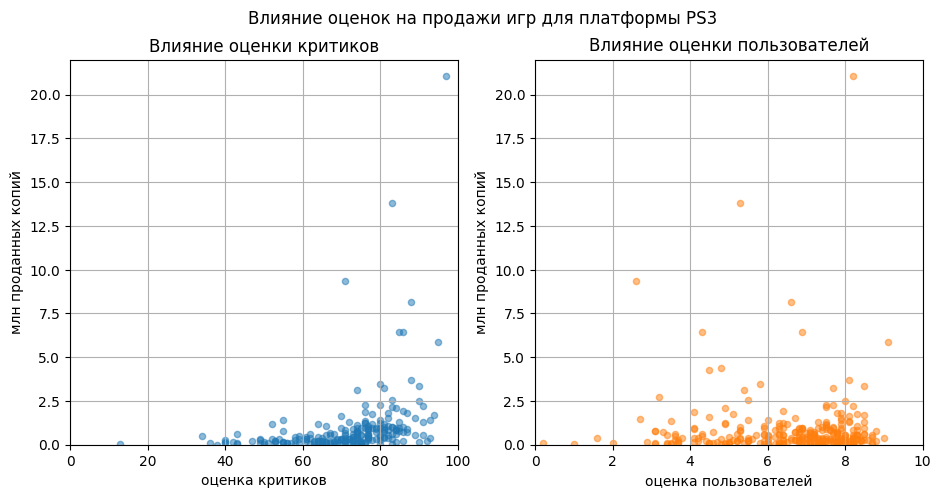

Матрица корреляции столбцов:


,critic_score,user_score,total_sales
critic_score,1.00,0.54,0.33
user_score,0.54,1.00,-0.01
total_sales,0.33,-0.01,1.00



4. Платформа WiiU:


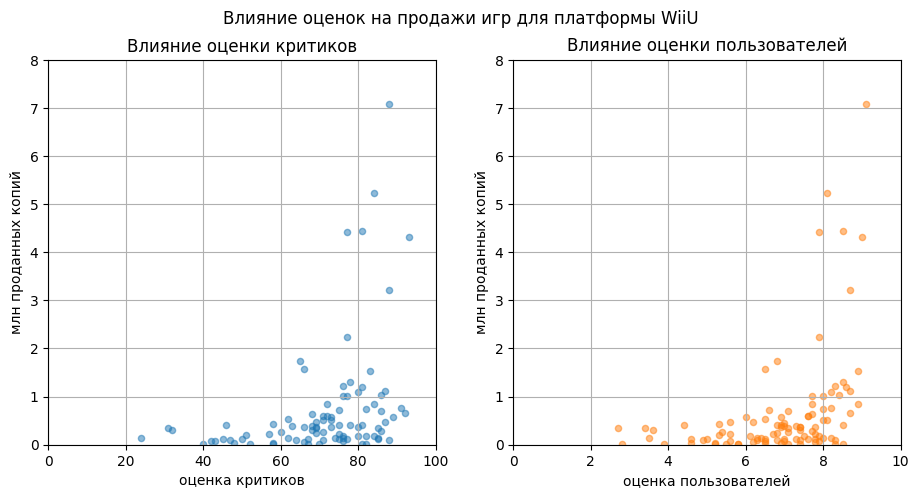

Матрица корреляции столбцов:


,critic_score,user_score,total_sales
critic_score,1.00,0.77,0.35
user_score,0.77,1.00,0.40
total_sales,0.35,0.40,1.00



5. Платформа X360:


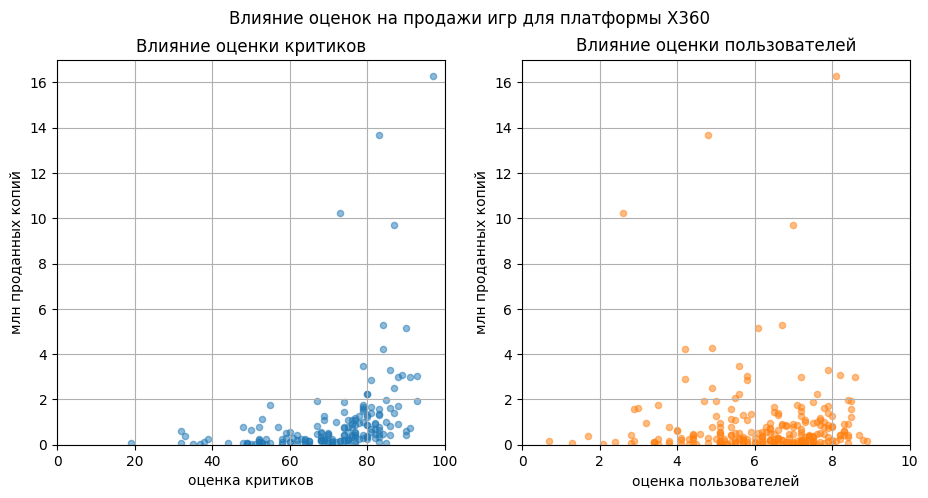

Матрица корреляции столбцов:


,critic_score,user_score,total_sales
critic_score,1.00,0.56,0.36
user_score,0.56,1.00,0.01
total_sales,0.36,0.01,1.00


In [75]:
# проводим анализ влияния оценок на продажи для выбранных платформ
for num, platform in enumerate(more_platforms):
    # выделяем данные по платформе
    data_platform = data_new.query('platform == @platform')
    
    print(f"{num + 1}. Платформа {platform}:")
    # строим диаграммы рассеяния и выводим матрицу корреляции
    sales_vs_ratings(data_platform, 
                      title='Влияние оценок на продажи игр для платформы ' + platform)
    print()

**Выводы**

Для всех рассмотренных платформ существует слабая положительная корреляция между оценкой критиков и суммарными продажами игр. 

Для наиболее перспективных платформ PS4 и XOne влияние оценки критиков на продажи самое высокое - коэффициент корреляции ≈0,4. А влияние оценок пользователей на продажи не прослеживается - коэффициент корреляции близок к нулю. Для платформ предыдущего поколения PS3 и X360 закономерности точно такие же.

Для платформ 3DS и WiiU высокая оценка пользователей тоже положительно влияет на продажи. Для платформы 3DS это влияние слабо - коэффициент корреляции ≈0,20. А для платформы WiiU оценки пользователей влияют на продажи сильнее, чем оценки критиков - коэффициент корреляции продаж с оценкой пользователей ≈0,40 против ≈0,35 для оценки критиков. Также для этих платформ выше корреляция между оценками пользователей и критиков (коэффициент корреляции более 0,7).

Таким образом, **влияние оценок критиков и пользователей на продажи** может различаться в зависимости от платформы: 
- Для наиболее перспективных платформ PS4 и XOne, также как и для платформ предыдущего поколения PS3 и X360, при прогнозировании продаж стоит ориентироваться на высокую оценку критиков, а не пользователей.
- Для платформ 3DS и WiiU на продажи влияют и оценка критиков, и оценка пользователей, причём между ними высокая корреляция.
- Для платформы WiiU влияние оценки пользователей на продажи выше, чем оценки критиков. Но поскольку между двумя оценками высокая корреляция, то можно также ориентироваться на высокую оценку критиков.

### Распределение игр по жанрам

Рассмотрим распределение игр по жанрам. Подсчитаем количество игр каждого жанра, суммарные продажи всех игр жанра и медианное значение продаж игр в данном жанре.

Медианное значение лучше характеризует данные о продажах игр по причине наличия выбросов - очень высоких продаж популярных игр (хитов), которые были рассмотрены ранее при построении диаграмм размаха.

In [76]:
# формируем сводную таблицу
genre_stat = (
    data_new
    .pivot_table(
        index='genre',
        aggfunc={
            'name': 'count',
            'total_sales': ['sum','median'],
        }
    )
    .droplevel(0, axis=1)
    .rename(columns={
        'median': 'median_sales',
        'sum': 'sum_sales',
    })
    .sort_values(by='count', ascending=False)
)
# добавляем столбец с долями (в %) от общего количества игр
genre_stat['count_percent'] = genre_stat['count'].transform(to_percent).round(2)
# добавляем столбец с долями (в %) от суммарных продаж
genre_stat['sales_percent'] = genre_stat['sum_sales'].transform(to_percent).round(2)
# выводим таблицу
genre_stat

,count,median_sales,sum_sales,count_percent,sales_percent
genre,,,,,
Action,1031,0.120,441.12,35.74,30.50
Role-Playing,370,0.140,192.80,12.82,13.33
Adventure,302,0.030,29.43,10.47,2.03
Sports,267,0.240,181.07,9.25,12.52
Shooter,235,0.440,304.73,8.15,21.07
Misc,192,0.120,85.04,6.66,5.88
Racing,115,0.140,53.50,3.99,3.70
Fighting,109,0.130,44.49,3.78,3.08
Platform,85,0.210,61.00,2.95,4.22


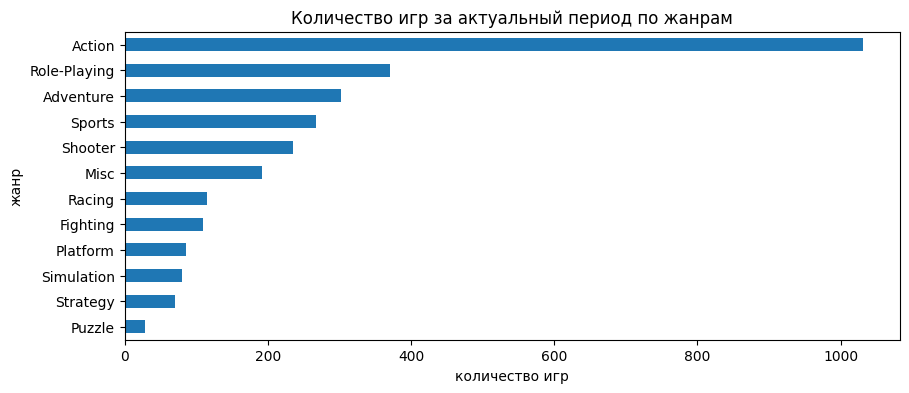

In [77]:
# строим график
(genre_stat
 .sort_values(by='count')
 .plot.barh(y='count', figsize=(10, 4), legend=False)
)
plt.title('Количество игр за актуальный период по жанрам')
plt.xlabel('количество игр')
plt.ylabel('жанр')
plt.show()

Топ-5 жанров по количеству игр:

In [78]:
# выводим таблицу
genre_stat[['count', 'count_percent']].head()

,count,count_percent
genre,,
Action,1031,35.74
Role-Playing,370,12.82
Adventure,302,10.47
Sports,267,9.25
Shooter,235,8.15


Покажем доли игр топ-5 жанров по количеству игр на круговой диаграмме.

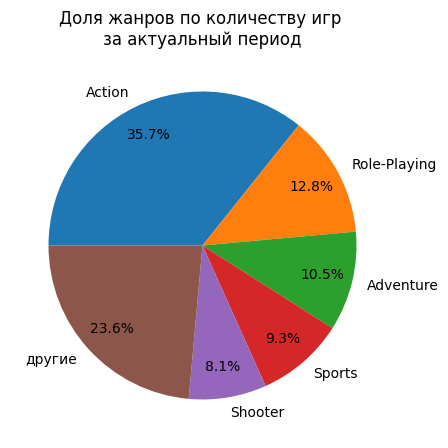

In [79]:
# строим круговую диаграмму с группировкой мелких долей
ax = plot_pie(genre_stat['count'], limit=5)
ax.set_title('Доля жанров по количеству игр \nза актуальный период');

Исследуем, как распределены продажи по жанрам.

Сначала рассмотрим распределение суммарных продаж по жанрам.

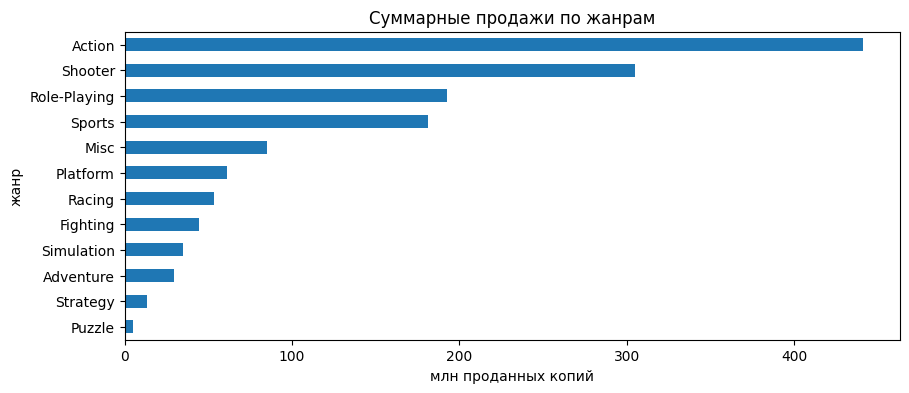

In [80]:
# строим и оформляем диаграмму
(genre_stat
 .sort_values(by='sum_sales')
 .plot.barh(y='sum_sales', figsize=(10, 4), legend=False)
)
plt.title('Суммарные продажи по жанрам')
plt.xlabel('млн проданных копий')
plt.ylabel('жанр')
plt.show()

По суммарным продажам за актуальный период с большим отрывом лидирует жанр Action, за ним следует жанр Shooter. 

Топ-5 жанров по суммарным продажам:

In [81]:
# выводим таблицу
(genre_stat
 [['sum_sales', 'sales_percent']]
 .sort_values(by='sum_sales', ascending=False)
 .head()
)

,sum_sales,sales_percent
genre,,
Action,441.12,30.50
Shooter,304.73,21.07
Role-Playing,192.80,13.33
Sports,181.07,12.52
Misc,85.04,5.88


Доли топ-5 жанров по продажам покажем на круговой диаграмме.

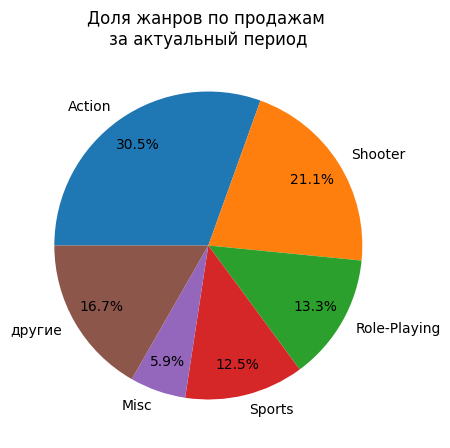

In [82]:
# строим круговую диаграмму с группировкой мелких долей
ax = plot_pie(genre_stat['sum_sales'], limit=5)
ax.set_title('Доля жанров по продажам \nза актуальный период');

Если в рамках планируемой рекламной кампании предполагается продвигать не конкретные игры, а жанры в целом, то следует сделать акцент на этих жанрах.

Однако если планируется продвигать отдельные игры, то надо выяснить, в каких жанрах больше **медианные продажи**. Игры этих жанров в среднем приносят наибольшие продажи, поэтому для продвижения в рекламной кампании конкретных игр предпочтительнее выбирать игры из этих трёх жанров. 

Рассмотрим распределение медианных продаж по жанрам.

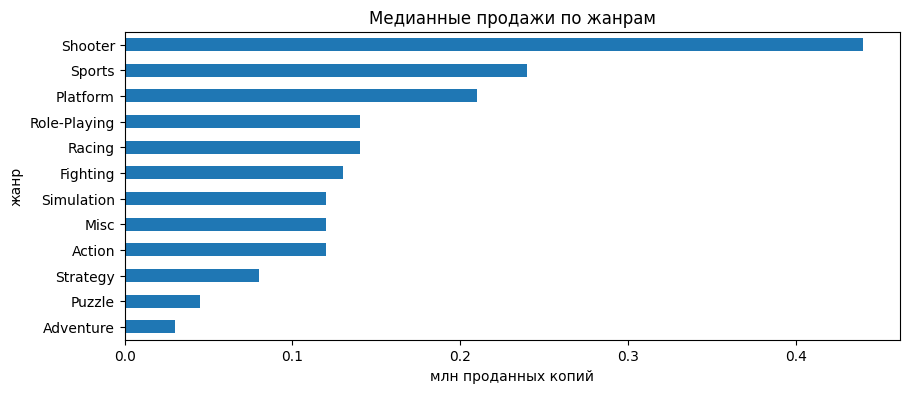

In [83]:
# строим и оформляем диаграмму
(genre_stat
 .sort_values(by='median_sales')
 .plot.barh(y='median_sales', figsize=(10, 4), legend=False)
)
plt.title('Медианные продажи по жанрам')
plt.xlabel('млн проданных копий')
plt.ylabel('жанр')
plt.show()

По медианным продажам за актуальный период с большим отрывом лидирует жанр Shooter. Второе и третье место занимают жанры Sports и Platform. Для этих трёх жанров медианные продажи выделяются в большую сторону на фоне среднего уровня медианных продаж для других жанров. Поэтому имеет смысл выделить **топ-3 наиболее прибыльных жанров**:

In [84]:
# выводим таблицу
(genre_stat['median_sales']
 .sort_values(ascending=False)
 .to_frame()
 .head(3)
)

,median_sales
genre,
Shooter,0.44
Sports,0.24
Platform,0.21


Выделяется также группа жанров с низкими медианными продажами - Strategy, Puzzle и Adventure. Затраты на продвижение игр этих жанров будут иметь меньшую отдачу, поэтому делать на них упор в рекламной кампании не рекомендуется.

Наименее прибыльные жанры:

In [85]:
# выводим таблицу
(genre_stat['median_sales']
 .sort_values(ascending=False)
 .to_frame()
 .tail(3)
)

,median_sales
genre,
Strategy,0.080
Puzzle,0.045
Adventure,0.030


### Вывод

В результате проведённого **исследовательского анализа** данных установлены следующие факты и закономерности:

1. Анализ **распределения игр по году выпуска** показал:
    - Игр, выпущенных в 1980-е годы и начале 1990-х, мало. Данные по играм для платформ, популярных в этот период, вряд ли помогут построить прогноз на 2017 год. Поэтому рассматривались только игры, выпущенные **не ранее 1994 года**.
    - Количество выпускаемых игр резко **снизилось с 2012 года**. Вероятно, это связано с ростом популярности игр для смартфонов, что привело к смещению фокуса разработчиков игр на платформы Android и iPhone, которые не представлены в имеющихся данных.
      
   <br/>   
2. Определены **платформы с наибольшими продажами** за период с 1994 года: PS2, X360, PS3, Wii, DS, PS (в порядке убывания продаж). Между этими шестью платформами и остальными наблюдается резкий разрыв более чем на 400 млн проданных копий.
   <br/> 
3. Анализ **динамики продаж по годам для платформ с наибольшими продажами** показал:
    - Новые успешные платформы появляются примерно каждые 5 лет.
    - Срок жизни (период от начала продаж игр для платформы до их прекращения) для платформ с наибольшими суммарными продажами довольно близок - от 10 до 12 лет, среднее значение - **11 лет**.
    - Платформа является актуальной и потенциально прибыльной, когда она находится в стадии высоких продаж, который составляет приблизительно половину от всего срока жизни платформы. 
    - Различные оценки **длительности периода актуальности платформы** (например, периода, в котором продажи превышают некоторое значение, или периода от начала продаж до достижения максимума продаж) дают близкие значения **4-6 лет**. 
    
   В результате определён **актуальный период** выхода игр для дальнейшего анализа: **5 лет с 2012 по 2016 год**. Учёт падения продаж игр с 2012 года в связи с ростом популярности игр для смартфонов тоже приводит к оценке периода актуальности в 5 лет (2012-2016) для построения прогноза на 2017 год.
   
   <br/> 
4. Определены **платформы-лидеры по продажам** за актуальный период: PS4, PS3, X360, 3DS, XOne (в порядке убывания продаж).

   <br/> 
5. Анализ **динамики продаж по платформам за актуальный период** показал:
    - В актуальном периоде игры выпускались для 11 платформ. Причём общие продажи игр с 2012 по 2015 год снижались (за 2016 год данные могут быть неполными).
    - Суммарная доля продаж игр для **пяти наиболее популярных платформ** (PS4, PS3, X360, 3DS, XOne) составляет более 82 %.
    - На фоне снижения суммарных продаж игр за рассматриваемый период, для отдельных платформ наблюдается рост продаж. К **растущим платформам** относятся **PS4** и **XOne**.
    - За рассматриваемый период произошла **смена лидирующих по продажам платформ**. Если в 2012 году основная часть продаж игр приходилась на платформы PS3 и X360, то с появлением в 2013 году платформ следующего поколения PS4 и XOne произошло перераспределение продаж в их пользу. По итогам 2015 года **лидерами по продажам** были **PS4** и **XOne**, а продажи игр для платформ предыдущего поколения PS3 и X360 сильно упали, хотя и превышают продажи игр для PC.
    - Продажи игр для PC тоже падают, однако это происходит плавно. Причина в том, что платформа PC занимает **особое положение** в связи с тем, что здесь не происходит смены поколений.
    - Продажи игр для **портативных игровых платформ** актуального поколения (3DS, PSV) падают. Причина тому - это взлёт популярности смартфонов в качестве игровых платформ в связи с ростом их производительности.
    - Все платформы **предыдущего поколения** (PS3, X360, Wii, DS, PSP) демонстрируют падение продаж.
   
   <br/> 
6. Анализ **динамики долей рынка по платформам за актуальный период** показал:
    - Для платформ PS4 и XOne доля рынка уверенно растёт. Для конкурирующей с ними платформы WiiU доля рынка медленно росла до 2014 года, а затем перешла к медленному снижению.
    - Доли рынка портативных игровых платформ актуального поколения 3DS и PSV в среднем за рассматриваемый период постепенно снижаются. 
    - Доля рынка платформы PC мала (3-4 %), но относительно стабильна.
    - Доли рынка платформ предыдущего поколения (PS3, X360, Wii, DS, PSP) быстро падают.
    
   В качестве **потенциально прибыльных платформ на 2017 год** уверенно можно выделить растущих лидеров рынка - платформы **PS4** и **XOne**. Перспективы роста платформы WiiU сомнительны по причине конкуренции с лидерами рынка. Портативные игровые платформы испытывают сильное давление со стороны смартфонов, поэтому следует ожидать дальнейшего падения продаж игр для них. Тем не менее, пока продажи для платформы 3DS в 3 раза превышают продажи игр для PC.

   <br/> 
7. Сравнительный анализ **распределения игр по продажам для разных платформ** показал:
    - На всех платформах количество игр, ставших хитами продаж, невелико - для каждой платформы в среднем всего несколько штук. Большинство игр имеет относительно невысокие продажи.
    - На портативных игровых платформах PSV и PSP хитов продаж меньше, на стационарных консолях. С другой стороны, на тоже портативных DS и 3DS существуют заметно выделяющиеся в продажах успешные игры. Отсутствие хитов на платформе PSP можно объяснить тем, что эта платформа находится в конце жизненного цикла и успешные игры для неё остались в прошлом.
    - Медианный уровень продаж и межквартильный размах для стационарных платформ (XOne, X360, PS4, PS3, WiiU, Wii) больше, чем для портативных (PSV, PSP, DS, 3DS). Это означает, что в целом **игры для стационарных консолей имеют более высокие продажи**, а также **более высокую долю успешных в продажах игр**. Больший разброс объясняется более высоким разнообразием игр на данных платформах.
    - Для PC медианные продажи тоже меньше, чем для стационарных консолей.
    
   Сделанные наблюдения подтверждают правильность выбора в качестве **перспективных потенциально прибыльных платформ** стационарных игровых консолей актуального поколения - платформ **PS4** и **XOne**.

   <br/> 
8. Анализ **влияния на продажи отзывов пользователей и критиков** показал: 
     - Для платформ, популярных в конце актуального периода, существует слабая положительная корреляция между оценкой критиков и продажами игры, т.е. высокая оценка от критиков положительно влияет на продажи игры. У игр, получивших низкую оценку от критиков, практически нет шансов стать успешными в продажах. Однако не факт, что получившие высокую оценку от критиков игры будут иметь высокие продажи. Значительное количество игр, получивших высокие оценки от критиков и пользователей, имеют низкие продажи.
    - Для наиболее перспективных платформ PS4 и XOne при прогнозировании продаж стоит ориентироваться на **высокую оценку критиков**. Для этих платформ влияние оценки пользователей на продажи не прослеживается, корреляция между оценкой пользователей и продажами игры отсутствует. В среднем оценки пользователей для успешных игр ниже, чем оценки критиков, и разброс их больше. Бóльшая часть высоко оценённых пользователями игр имеет низкие продажи.
    - Для платформ 3DS и WiiU на продажи влияют и оценка критиков, и оценка пользователей, причём между двумя оценками существует высокая корреляция. При этом для платформы WiiU положительное влияние оценки пользователей на продажи выше, чем оценки критиков. Но поскольку между двумя оценками высокая корреляция, то можно также ориентироваться и на высокую оценку критиков.
    
   Таким образом, в целом при выборе потенциально успешной игры для продвижения в рекламной кампании **предпочтительнее ориентироваться на оценку критиков**. Высокая оценка от критиков означает, что у игры есть шансы на успех в продажах. А если оценка критиков низкая, то от продвижения такой игры лучше отказаться. Для отдельных платформ, в частности WiiU, также можно учитывать и оценку пользователей.

   <br/> 
9. Анализ **распределения игр по жанрам** показал:
    - Больше всего игр за актуальный период выпущено в жанре Action (≈35 % от общего количества). Затем по убыванию долей от 13 % до 8 % следуют жанры Role-Playing, Adventure, Sports, Shooter.
    - По **суммарным продажам** за актуальный период с большим отрывом лидирует жанр **Action**. За ним следует жанр Shooter, далее тоже с большим разрывом Role-Playing и Sports. Поэтому если в рамках планируемой рекламной кампании предполагается **продвижение определённого жанра в целом**, а не конкретных игр, то следует сделать акцент на этих жанрах.
    - По **медианным продажам** игр за актуальный период с большим отрывом лидирует жанр **Shooter**. Второе и третье место занимают жанры Sports и Platform. Поэтому для **продвижения в рекламной кампании конкретных игр** предпочтительнее выбирать игры этих наиболее прибыльных жанров, поскольку они в среднем приносят наибольшие продажи.
    - Выделяется группа **жанров с низкими медианными продажами** - Strategy, Puzzle и Adventure. Затраты на продвижение игр этих жанров будут иметь меньшую отдачу, поэтому делать на них упор в рекламной кампании не рекомендуется.

## Портрет пользователя по регионам

Для составления портрета пользователя определённого региона по данным о продажах игр определим для каждого региона:
- Топ-5 самых популярных платформ.
- Топ-5 самых популярных жанров.
- Распределение продаж в регионе по рейтингу ESRB.

Используем для получения портрета пользователя региона с кодом `region` по данным `data` функцию `user_persona(data, region)`, а для визуализации этих данных - функцию `display_user_persona(data, region, region_name)`, где `region_name` - название региона.

In [86]:
def user_persona(data, region):
    """
    Возвращает таблицы с продажами и процентом от суммарных продаж
    по платформам, жанрам и рейтингам ESRB для заданного 
    кода региона 'region' на основе данных в таблице 'data'.
    """
    # функция для формирования сводной таблицы
    def top_by_sales(column):
        try:
            sales_column = region.lower() + '_sales'
            top = (
                data
                # формируем сводную таблицу
                .pivot_table(
                    index=column,
                    values=sales_column,
                    aggfunc='sum',
                )
                # сортируем по убыванию продаж
                .sort_values(by=sales_column, ascending=False)
                # переименовываем столбец
                .rename(columns={sales_column: 'sales'})          
            )
            # добавляем столбец с долями (в %) от суммарных продаж
            top['sales_percent'] = top['sales'].transform(to_percent).round(2)
            
            return top
        except:
            print(f'Error in function: top_by_sales({column}) for {region=}')
            return pd.DataFrame()
        
    # формируем сводные таблицы
    platforms = top_by_sales('platform')
    genres = top_by_sales('genre')
    ratings = top_by_sales('rating')
    
    return platforms, genres, ratings

In [87]:
def display_user_persona(data, region, region_name, top=5):
    """
    Выводит таблицы и строит диаграммы, характеризующие портрет пользователя региона
    с кодом 'region' и названием 'region_name' на основе данных в таблице 'data'.
    """
    # функция для построения столбчатой диаграммы
    def plot_barh(data_column, ax=None):
        if ax is None:
            fig, ax = plt.subplots()
        # строим график
        (data_column
         .sort_values()
         .plot.barh(ax=ax, legend=False)
        )
        ax.set_ylabel('')
        return ax
    
    # получаем данные портрета пользователя
    platforms, genres, ratings = user_persona(data, region)
    platforms_top = platforms.head(top)
    genres_top = genres.head(top)
    # выводим таблицы
    display(platforms_top, 
            genres_top, 
            ratings)
    
    # строим и оформляем графики:
    # создаём область построения графиков 
    fig, axs = plt.subplots(3, 2, constrained_layout=True)
    
    # топ-5 платформ
    plot_barh(platforms_top['sales'], ax=axs[0, 0])
    axs[0, 0].set_title(f'Топ-{top} платформ по продажам игр')
    axs[0, 0].set_xlabel('млн проданных копий')
    
    plot_pie(platforms['sales'], ax=axs[0, 1], limit=top)
    axs[0, 1].set_title(f'Доли топ-{top} платформ в продажах игр')
    
    # топ-5 жанров
    plot_barh(genres_top['sales'], ax=axs[1, 0])
    axs[1, 0].set_title(f'Топ-{top} жанров по продажам игр')
    axs[1, 0].set_xlabel('млн проданных копий')
    
    plot_pie(genres['sales'], ax=axs[1, 1], limit=top)
    axs[1, 1].set_title(f'Доли топ-{top} жанров в продажах игр')

    # продажи по рейтингам ESRB
    plot_barh(ratings['sales'], ax=axs[2, 0])
    axs[2, 0].set_title('Распределение продаж игр по рейтингам ESRB')
    axs[2, 0].set_xlabel('млн проданных копий')
    
    plot_pie(ratings['sales'], ax=axs[2, 1])
    axs[2, 1].set_title('Доли продаж игр по рейтингам ESRB')
    
    # оформление
    fig.suptitle(region_name + ' (' + region.upper() + ')')
    fig.set_figwidth(12)
    fig.set_figheight(12)

    return fig, axs

Перед тем, как составить портрет пользователя каждого региона, найдём для разных регионов их доли  от общемирового рынка игр за актуальный период.

In [88]:
# суммируем продажи по регионам
# и находим их доли в %
(data_new[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
 .sum()
 .to_frame()
 .transform(to_percent)
 .round(2)
 .T
 .add_suffix('_percent')
)

,na_sales_percent,eu_sales_percent,jp_sales_percent,other_sales_percent
0,40.85,35.04,13.31,10.8


Рынки Северной Америки и Европы близки по объёму и в сумме составляют более 75 % от общемирового, а объём рынка Японии значительно меньше.

### Северная Америка

Получим портрет пользователя для данного региона.

,sales,sales_percent
platform,,
X360,140.05,23.70
PS4,108.74,18.40
PS3,103.38,17.49
XOne,93.12,15.76
3DS,55.31,9.36


,sales,sales_percent
genre,,
Action,177.84,30.09
Shooter,144.77,24.50
Sports,81.53,13.80
Role-Playing,64.00,10.83
Misc,38.19,6.46


,sales,sales_percent
rating,,
M,231.57,39.18
E,114.37,19.35
RP,103.31,17.48
E10+,75.70,12.81
T,66.02,11.17


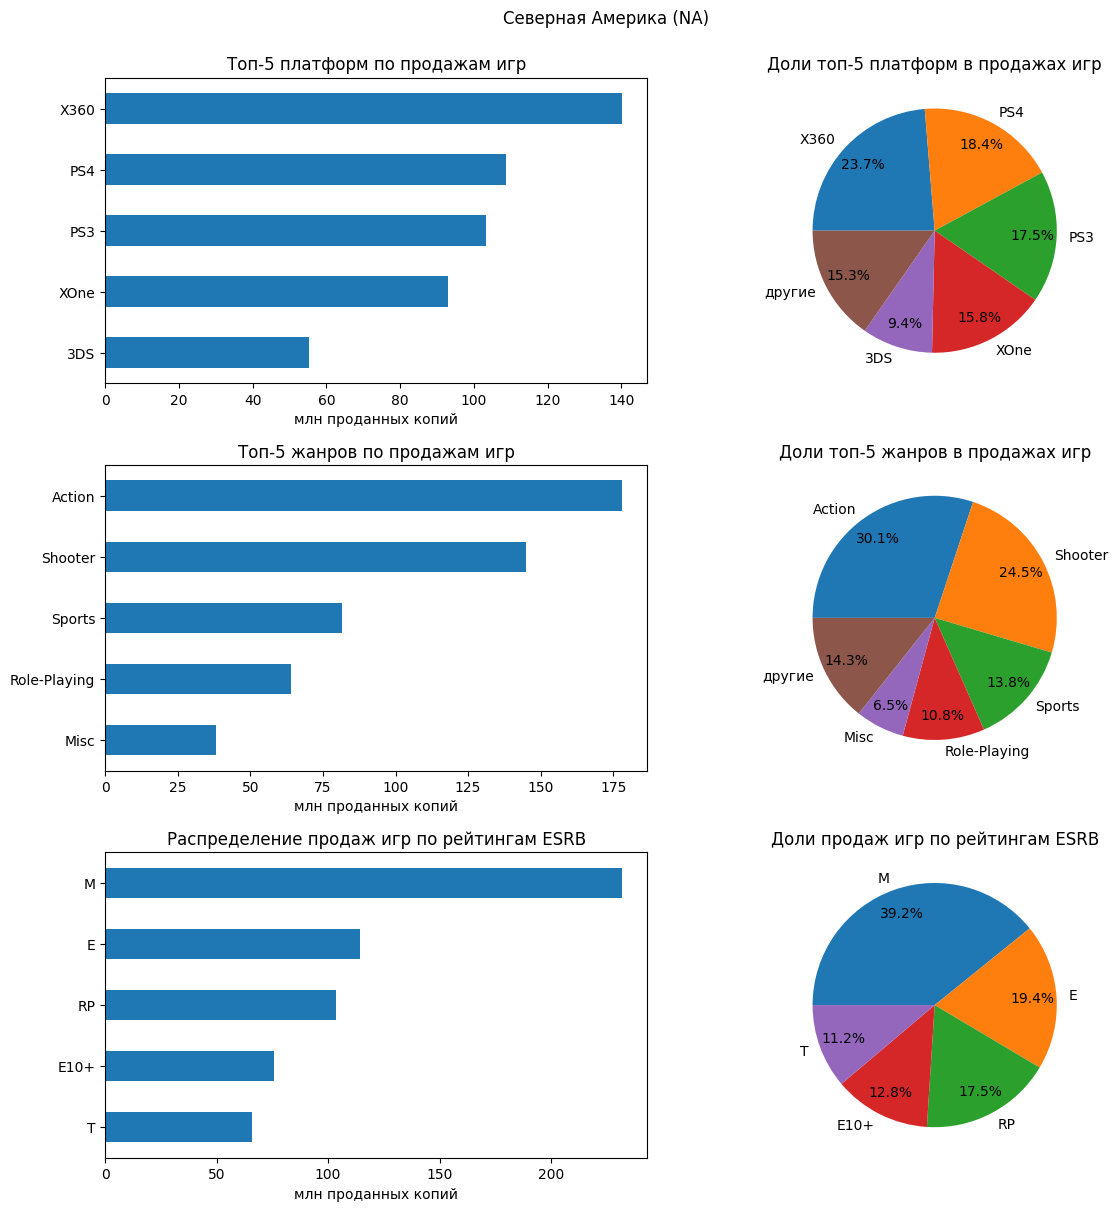

In [89]:
# выводим графики,
# описывающие портрет пользователя заданного региона
display_user_persona(data_new, 'NA', 'Северная Америка');

**Платформы**

Самая популярная платформа на рынке Северной Америки - X360 (≈24 % всех продаж). Далее следуют три платформы с близкими долями: PS4 (≈18 %), PS3 (≈17 %) и XOne (≈16 %). Среди 5 самых популярных платформ 4 - стационарные, и только на 5-м месте по продажам портативная игровая платформа 3DS (≈9 %). Суммарная доля топ-5 популярных платформ в продажах составляет ≈85 %.

По сравнению с рассмотренным ранее общемировым распределением продаж заметна более высокая доля версий платформ Xbox от американской компании Microsoft.

Платформа XOne пришла на смену X360, но пока ещё по продажам игр доминирует платформа прошлого поколения. Аналогично PS4 пришла на смену PS3, но уже обгоняет её по продажам игр. Поскольку платформы PS4 и XOne появились почти одновременно, то можно сделать вывод, что в отличие от предыдущего, новое поколение PlayStation успешнее, чем Xbox.

**Жанры**

Самый популярный жанр игр на рынке Северной Америки - Action (≈30 % всех продаж), за ним следует Shooter (≈25 %), затем Sports (≈14 %) и Role-Playing (≈11 %). Популярны и игры прочих жанров - Misc (≈6 %), не относящиеся ни к одному из 11 жанров, по которым производилась классификация.

В целом распределение продаж по жанрам на рынке Северной Америки соответствует общемировому.

Из выделенных ранее наиболее прибыльных жанров в Северной Америке в топ-5 по продажам входят жанры Shooter (≈145 млн проданных копий) и Sports (≈82 млн проданных копий).

**Рейтинг ESRB**

Наибольшую долю в продажах (≈39 %) на рынке Северной Америки занимают игры с рейтингом M (Mature 17+). Возможно, есть связь с популярностью жанров Action и Shooter, игры в которых часто получают такой рейтинг. 

Большая доля игр с ограничением по возрасту 17+ означает, что значительная доля пользователей относится к этой возрастной категории. 

Получается, что наличие в игре контента, предусматривающего рейтинг M (жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубая ненормативная лексика) способствует успеху игры в продажах. 

**Портрет типичного пользователя**

Типичный пользователь в Северной Америке предпочитает игры жанра Action с рейтингом M для платформы X360.

### Европа

Получим портрет пользователя для данного региона.

,sales,sales_percent
platform,,
PS4,141.09,27.84
PS3,106.86,21.08
X360,74.52,14.70
XOne,51.59,10.18
3DS,42.64,8.41


,sales,sales_percent
genre,,
Action,159.34,31.44
Shooter,113.47,22.39
Sports,69.09,13.63
Role-Playing,48.53,9.58
Racing,27.29,5.38


,sales,sales_percent
rating,,
M,193.96,38.27
E,113.03,22.30
RP,91.50,18.05
E10+,55.37,10.92
T,52.96,10.45


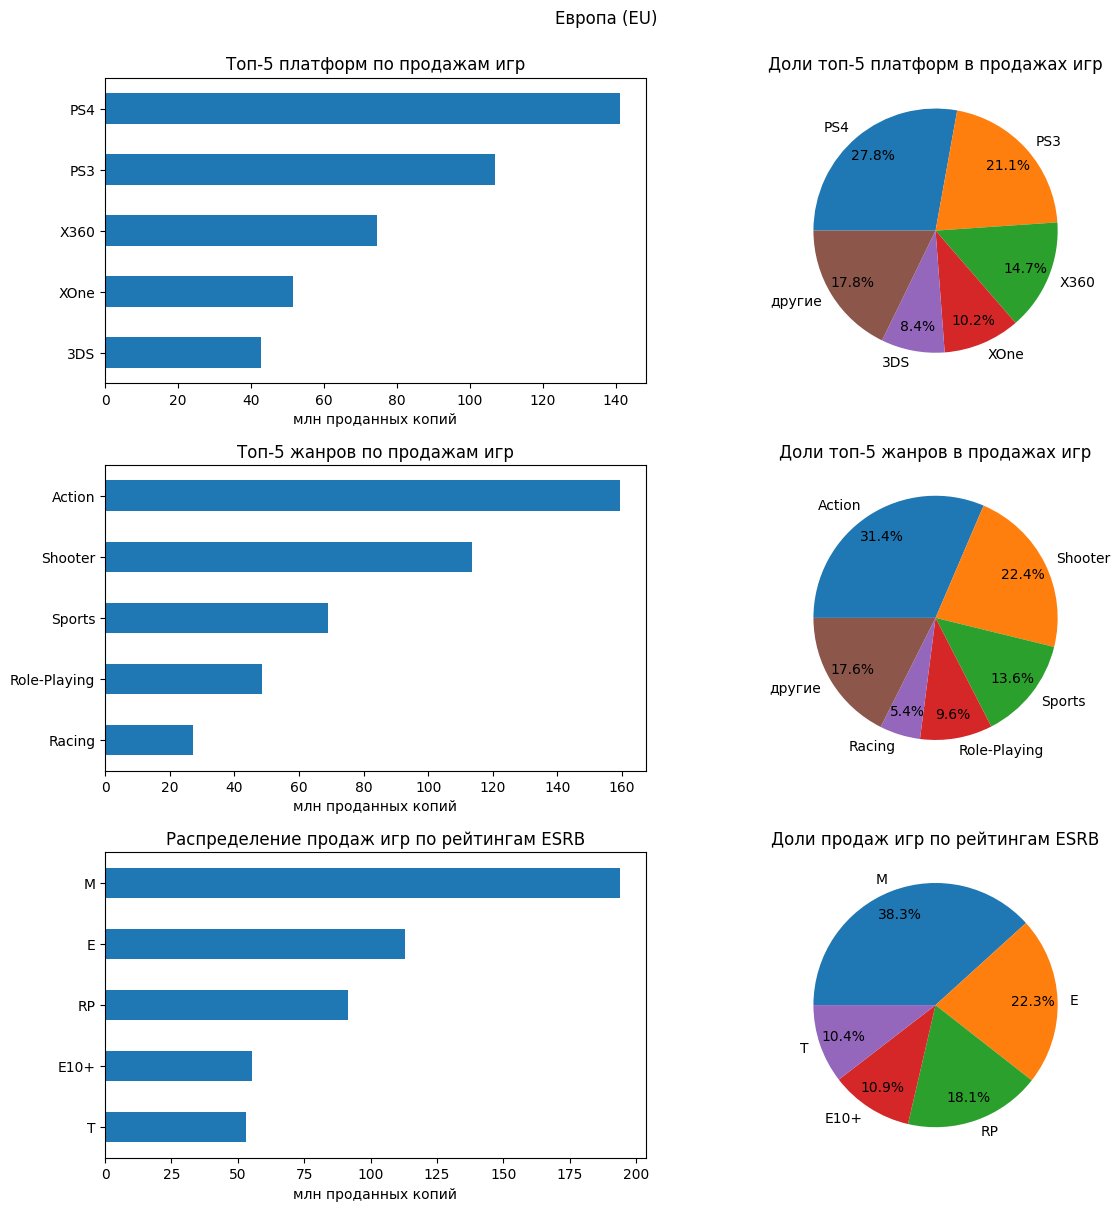

In [90]:
# выводим графики,
# описывающие портрет пользователя заданного региона
display_user_persona(data_new, 'EU', 'Европа');

**Платформы**

Самая популярная платформа на рынке Европы - PS4 (≈28 % всех продаж), затем следует её предыдущее поколение - платформа PS3 (≈21 %). Далее идут версии Xbox: X360 (≈15 %) и XOne (≈10 %). В отличие от Северной Америки, PlayStation в Европе популярнее, чем Xbox. Также как и в Северной Америке, 4 из 5 самых популярных платформ - стационарные, а замыкает топ-5 портативная игровая платформа 3DS (≈8 %). Суммарная доля топ-5 популярных платформ в продажах составляет ≈82 %.

По сравнению с Северной Америкой, в Европе обе версии PlayStation более популярны, чем Xbox. Однако замеченная закономерность сохраняется - новое поколение PlayStation в Европе также успешнее, чем конкурирующая версия Xbox.

**Жанры**

Распределение продаж по жанрам в Европе практически повторяет картину для Северной Америки и соответствует общемировому: самый популярный жанр - Action (≈31 % всех продаж), за ним следует Shooter (≈22 %), затем Sports (≈14 %) и Role-Playing (≈10 %). Доли этих жанров в Европе и Северной Америке почти одинаковы. Отличается только последняя позиция в топ-5: в Европе топ по продажам замыкает жанр Racing (≈5 %).

Также как и в  Северной Америке, из выделенных ранее наиболее прибыльных жанров в Европе в топ-5 по продажам входят жанры Shooter (≈113 млн проданных копий) и Sports (≈69 млн проданных копий).

**Рейтинг ESRB**

Распределение продаж игр с различными рейтингами ESRB в Европе тоже практически повторяет картину для Северной Америки. В Европе тоже по продажам доминируют игры с рейтингом M (≈38 %). Это тоже, наверное, обусловлено популярностью жанров Action и Shooter.

**Портрет типичного пользователя**

Типичный пользователь в Европе предпочитает игры жанра Action с рейтингом M для платформы PS4.

### Япония

Получим портрет пользователя для данного региона.

,sales,sales_percent
platform,,
3DS,87.79,45.59
PS3,35.29,18.32
PSV,21.04,10.93
PS4,15.96,8.29
WiiU,13.01,6.76


,sales,sales_percent
genre,,
Role-Playing,65.44,33.98
Action,52.80,27.42
Misc,12.86,6.68
Simulation,10.41,5.41
Fighting,9.44,4.90


,sales,sales_percent
rating,,
RP,108.84,56.52
E,28.33,14.71
T,26.02,13.51
M,21.20,11.01
E10+,8.19,4.25


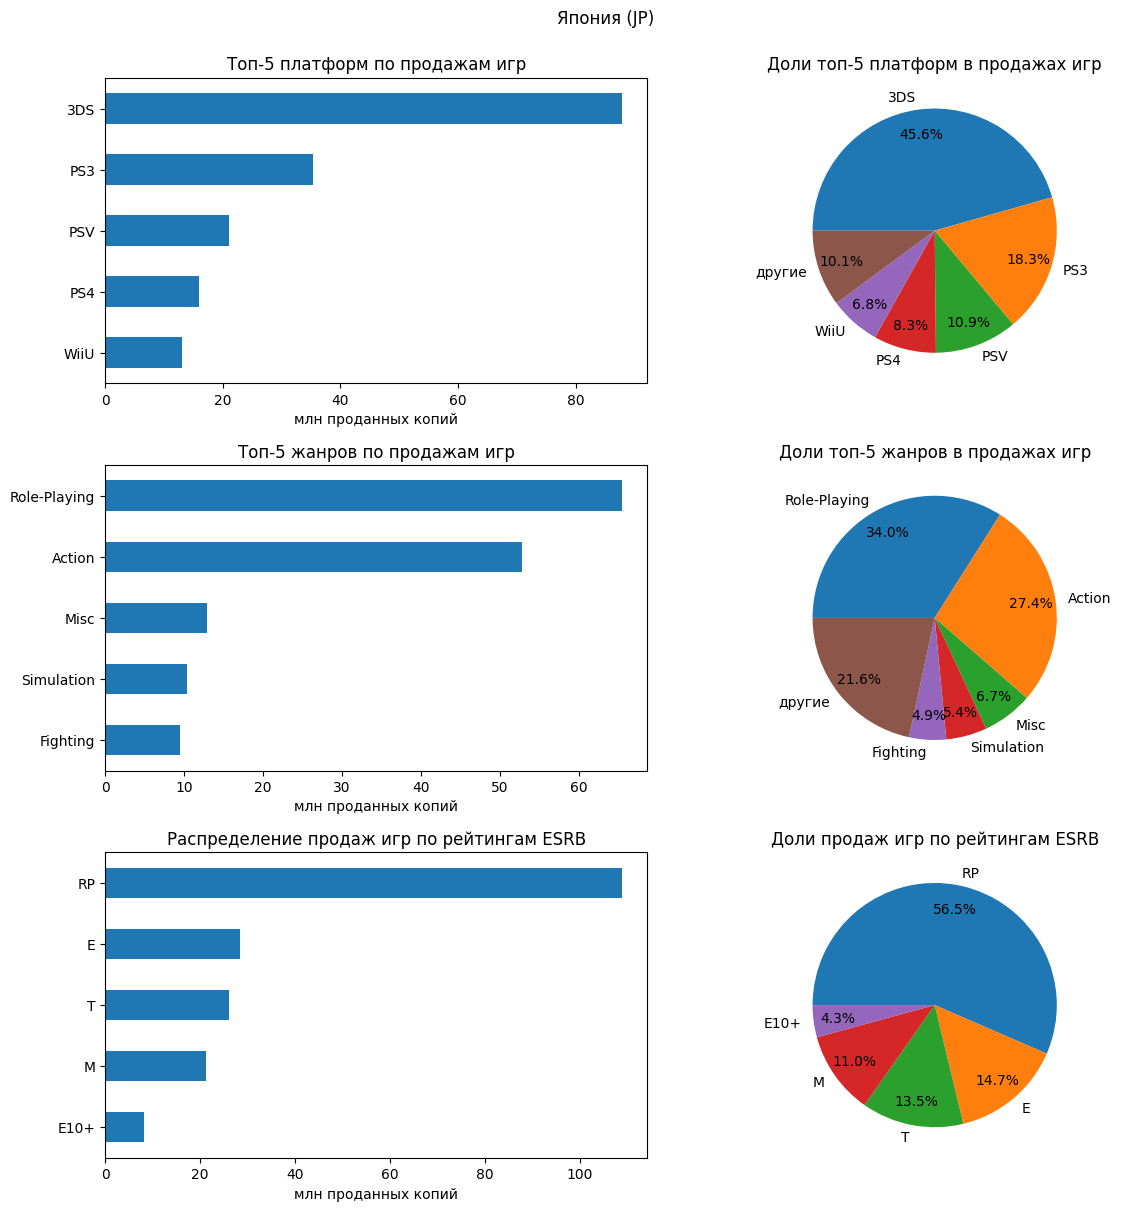

In [91]:
# выводим графики,
# описывающие портрет пользователя заданного региона
display_user_persona(data_new, 'JP', 'Япония');

Рынок Японии очень специфичен, он сильно отличается от похожих друг на друга рынков Европы и Северной Америки и не следует общемировым тенденциям.

**Платформы**

В топе популярных платформ присутствуют исключительно платформы японских компаний Nintendo и Sony. 

Характерным отличием японского рынка является значительно более высокая доля продаж игр для портативных платформ. С большим отрывом лидирует по продажам игр портативная платформа 3DS от Nintendo (≈46 % всех продаж). Конкурирующая портативная платформа PSV от Sony занимает 3-е место по продажам (≈11 %). 

2-е и 4-е места по продажам игр занимают версии PlayStation: PS3 (≈18 %) и PS4 (≈8 %). Замыкает топ-5 платформа WiiU от Nintendo (≈7 %).

В Японии доля прочих платформ, не входящих в топ-5, минимальна среди рассмотренных регионов. Суммарная доля топ-5 популярных платформ в продажах составляет ≈90 %.  

**Жанры**

Распределение продаж по жанрам в Японии также существенно отличается. Наиболее популярен жанр Role-Playing (≈34 % всех продаж), который даже обогнал по продажам самый популярный в мире в целом жанр Action (у него ≈27 % всех продаж). Игры других жанров не очень популярны: доля каждого менее 7 %. 

Из топ-5 жанров самым прибыльным по медианным продажам является наиболее популярный жанр Role-Playing (≈65 млн проданных копий). 

В топ-5 жанров в Японии попали Simulation и Fighting, а популярные в остальном мире Shooter и Sports не попали.

**Рейтинг ESRB**

Распределение продаж игр с различными рейтингами ESRB в Японии тоже кардинально другое. Больше половины продаж (≈56 %) приходится на игры, не имеющие рейтинга ESRB (значение-заполнитель пропусков "RP"). Вероятно, это связано с тем, что в Японии существует своя местная система возрастных рейтингов CERO. Можно предположить, что игры местных разработчиков, популярные на родном японском рынке, не получают рейтинг ESRB. А рейтинг ESRB имеют в основном игры иностранных (для Японии) разработчиков. Таким образом, в Японии рейтинг ESRB не оказывает влияния на продажи игр.

Среди игр, имеющих рейтинг ESRB, примерно одинаковые доли (13-15 %) в продажах занимают игры с рейтингами E (Everyone - без ограничения по возрасту) и T (Teen 13+). Игры с рейтингом M, популярные в Европе и Северной Америке, имеют низкую долю в продажах (≈11 %). Это означает, что **иностранные** игры с "взрослым" контентом не популярны в Японии.
 
Из-за значительной доли продаж, приходящейся на игры с неизвестным рейтингом, нельзя сделать однозначный вывод о том, что в Японии меньше доля пользователей возрастной категории 17+.

**Портрет типичного пользователя**

Типичный пользователь в Японии предпочитает игры жанра Role-Playing без рейтинга ESRB (вероятно, местных разработчиков) для платформы 3DS.

### Вывод

По данным о продажах игр для трёх регионов (Северная Америка, Европа, Япония) определены наиболее популярные платформы и жанры, а также исследовано влияние рейтинга ESRB на продажи. В результате составлены портреты пользователя каждого региона:

**Северная Америка**: 

Типичный пользователь в Северной Америке предпочитает игры жанра Action с рейтингом M для платформы X360.
- Платформы:
    - Самая популярная платформа - X360 (≈24 % всех продаж). 
    - По сравнению с общемировым распределением продаж по платформам выше доля версий платформ Xbox от американской компании Microsoft. 
    - Среди 5 самых популярных платформ 4 - стационарные (X360, PS4, PS3 и XOne), и только на 5-м месте по продажам портативная игровая платформа 3DS.
- Жанры:
    - Распределение продаж по жанрам в целом соответствует общемировому. 
    - Самый популярный жанр  - Action (≈30 % всех продаж), за ним следует Shooter, затем Sports и Role-Playing. Популярны и игры прочих жанров - Misc, не относящиеся ни к одному из 11 жанров, по которым производилась классификация.
    - Из наиболее прибыльных жанров в топ-5 по продажам входят жанры Shooter (≈145 млн проданных копий) и Sports (≈82 млн проданных копий).
- Рейтинг ESRB:
    - Наибольшую долю в продажах (≈39 %) занимают игры с рейтингом M (Mature 17+). Возможно, есть связь с популярностью жанров Action и Shooter, игры в которых часто получают такой рейтинг. 
    - Большая доля игр с ограничением по возрасту 17+ означает, что значительная доля пользователей относится к этой возрастной категории.  
   

**Европа**: 

Типичный пользователь в Европе предпочитает игры жанра Action с рейтингом M для платформы PS4.
- Платформы:
    - Самая популярная платформа - PS4 (≈28 % всех продаж), затем следует её предыдущее поколение - платформа PS3 (≈21 %). 
    - В отличие от Северной Америки, PlayStation в Европе популярнее, чем Xbox. 
    - Также как и в Северной Америке, 4 из 5 самых популярных платформ - стационарные (PS4, PS3б, X360 и XOne), а замыкает топ-5 портативная игровая платформа 3DS. 
- Жанры:
    - Распределение продаж по жанрам в Европе практически повторяет картину для Северной Америки и соответствует общемировому.
    - Самый популярный жанр - Action (≈31 % всех продаж), за ним следует Shooter, затем Sports и Role-Playing. Доли этих жанров в Европе и Северной Америке почти одинаковы, отличается только последняя позиция в топ-5: в Европе это жанр Racing.
    - Из наиболее прибыльных жанров в топ-5 по продажам входят жанры Shooter (≈113 млн проданных копий) и Sports (≈69 млн проданных копий).
- Рейтинг ESRB:
    - Распределение продаж игр с различными рейтингами ESRB в Европе тоже практически повторяет картину для Северной Америки. В Европе тоже по продажам доминируют игры с рейтингом M (≈38 %). Это тоже, наверное, обусловлено популярностью жанров Action и Shooter.
    
**Япония**: 

Типичный пользователь в Японии предпочитает игры жанра Role-Playing без рейтинга ESRB (вероятно, местных разработчиков) для платформы 3DS.
- Платформы:
    - В топ-5 популярных платформ присутствуют исключительно платформы японских компаний Nintendo и Sony. 
    - Характерным отличием японского рынка является значительно более высокая доля продаж игр для портативных платформ. С большим отрывом лидирует по продажам игр портативная платформа 3DS от Nintendo (≈46 % всех продаж). Конкурирующая портативная платформа PSV от Sony занимает 3-е место по продажам.
    - Стационарные платформы PS3, PS4 и WiiU занимают соответственно 2-е, 4-е  и 5-е места в топ-5 по продажам игр.
    - В Японии доля прочих платформ, не входящих в топ-5, минимальна среди рассмотренных регионов. 
- Жанры:
    - Распределение продаж по жанрам в Японии также существенно отличается от других регионов. Самый популярный жанр - Role-Playing (≈34 % всех продаж), который даже обогнал по продажам самый популярный в мире в целом жанр Action (у него ≈27 % всех продаж). Игры других жанров не очень популярны: доля каждого менее 7 %. 
    - Из топ-5 жанров самым прибыльным по медианным продажам является наиболее популярный жанр Role-Playing (≈65 млн проданных копий).
    - В топ-5 жанров в Японии попали Simulation и Fighting, а популярные в остальном мире Shooter и Sports не попали.
- Рейтинг ESRB:
    - Распределение продаж игр с различными рейтингами ESRB в Японии тоже кардинально другое. Больше половины продаж (≈56 %) приходится на игры, не имеющие рейтинга ESRB. Вероятно, это связано с тем, что в Японии существует своя местная система возрастных рейтингов CERO. Можно предположить, что игры местных разработчиков, популярные на родном японском рынке, не получают рейтинг ESRB. А рейтинг ESRB имеют в основном игры иностранных (для Японии) разработчиков. 
    - Среди игр, имеющих рейтинг ESRB, примерно одинаковые доли в продажах занимают игры с рейтингами E (Everyone - без ограничения по возрасту) и T (Teen 13+). Игры с рейтингом M, популярные в Европе и Северной Америке, имеют низкую долю в продажах (≈11 %). Это означает, что **иностранные** игры с "взрослым" контентом не популярны в Японии. 

**Влияние рейтинга ESRB на продажи**
- В Северной Америке и Европе наибольшую долю в продажах (≈39 %) занимают игры с рейтингом M (Mature 17+). Получается, что наличие в игре контента, предусматривающего рейтинг M (жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубая ненормативная лексика) способствует успеху игры в этих регионах. 
- В Японии больше половины продаж (≈56 %) приходится на игры, не имеющие рейтинга ESRB. Таким образом, в Японии рейтинг ESRB не оказывает влияния на продажи игр.   
 
**Сравнение успешности поколений PlayStation и Xbox**
- И в Северной Америке, и в Европе по продажам игр новое поколение PlayStation - платформа PS4 превосходит платформу предыдущего поколения PS3. 
- Для поколений Xbox картина противоположная - X360 превосходит по продажам игр платформу нового поколения XOne.
  
  Поскольку платформы PS4 и XOne появились почти одновременно, то можно сделать вывод, что в отличие от предыдущего, новое поколение PlayStation - PS4 успешнее, чем конкурирующая версия Xbox - XOne.

**Рекомендации**
- Рынки Северной Америки и Европы похожи друг на друга и следуют общемировым тенденциям - они близки по объёму продаж, в топ-5 по популярности одни и те же платформы, похожее распределение продаж по жанрам и рейтингам ESRB. Поэтому рекомендации по выбору предпочтительных платформ и жанров для проведения рекламных кампаний, сформулированные ранее исходя из данных о глобальных продажах, справедливы для обоих этих регионов.

- Рынок Японии очень специфичен и по популярности разных платформ, и по популярности жанров, поэтому при планировании рекламных кампаний требует особого подхода, учитывающего его главные особенности: популярность портативных игровых платформ и жанра Role-Playing. При этом рынок Японии по объёму продаж значительно меньше североамериканского и европейского, поэтому при проведении рекламных кампаний не является приоритетным. Тем не менее, есть и кое-что общее с глобальным рынком - в топ-5 популярных платформ входят PS3 и PS4, а в топ-5 жанров - популярный во всём мире жанр Action. В связи с этим глобальные рекламные кампании будут ограниченно эффективны и на японском рынке. 

## Проверка гипотез

Для проверки гипотез о соотношении средних пользовательских рейтингов на разных платформах и для разных жанров нужно сперва подготовить данные:
- удалить строки с пропущенными значениями оценок пользователей,
- выбрать только нужные столбцы из таблицы.

In [92]:
# готовим нужный срез данных:
# удаляем строки с пропусками 
# и выбираем нужные столбцы
data_subset = (
    data_new
    .dropna(subset=['user_score'])
    [['name', 'platform', 'year_of_release', 'genre', 'user_score']]
)
# общая информация о таблице
data_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1530 entries, 16 to 16692
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1530 non-null   object 
 1   platform         1530 non-null   object 
 2   year_of_release  1530 non-null   int64  
 3   genre            1530 non-null   object 
 4   user_score       1530 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 71.7+ KB


Для формирования вывода о возможности отвергнуть нулевую гипотезу для заданного уровня статистической значимости $\alpha$ (`alpha`) по полученному результату t-теста (`result`) используем функцию `hypothesis_test(result, alpha)`, которая выводит статистику разности (`result.statistic`) и p-value (`result.pvalue`),  сравнивает p-value с $\alpha$ и возвращает вывод в текстовой форме.

In [93]:
def hypothesis_test(result, alpha):
    """
    По заданным аргументам - результату t-теста и уровню статистической значимости 
    выводит результат проверки гипотезы: отвергнуть нулевую гипотезу или нет.
    """
    print(f'Статистика разности (t-statistic): {result.statistic:.2f}')
    print(f'P-value: {result.pvalue:.4g}')
    print('Уровень статистической значимости:', alpha)
    # проверяем p-value
    if result.pvalue < alpha:
        print(f'P-value < {alpha}. Отвергаем нулевую гипотезу.')
    else:
        print(f'P-value ≥ {alpha}. Нельзя отвергнуть нулевую гипотезу.')

### Сравнение средних пользовательских рейтингов платформ Xbox One и PC

Проверим гипотезу о том, что средние пользовательские рейтинги платформ XOne и PC одинаковы.

Будем считать, что сравниваемые выборки независимы. Это оправдано, т.к. сравниваются случайные выборки из обеих генеральных совокупностей. Поэтому для проверки гипотезы нужно использовать **двухвыборочный t-тест для независимых выборок**. 

Сформулируем **нулевую гипотезу** $H_0$: «Среднее по генеральной совокупности значение пользовательской оценки игр для платформы XOne равно среднему по генеральной совокупности значению пользовательской оценки игр для платформы PC».

В качестве **альтернативной гипотезы** $H_1$ выберем двустороннюю: «Среднее по генеральной совокупности значение пользовательской оценки игр для платформы XOne **не равно** среднему по генеральной совокупности значению пользовательской оценки игр для платформы PC».

Подготовим сравниваемые выборки - это будут столбцы с оценками пользователей из двух таблиц, в каждой из которых представлены пользовательские оценки игр для соответствующей платформы.

In [94]:
# из подготовленного заранее среза данных data_subset
# выбираем игры для платформы XOne
# и отбрасываем ненужные столбцы
xone_data = (
    data_subset
    .query('platform == "XOne"')
    .drop(['platform', 'genre'], axis=1)   
)
# из подготовленного заранее среза данных data_subset
# выбираем игры для платформы PC
# и отбрасываем ненужные столбцы
pc_data = (
    data_subset
    .query('platform == "PC"')
    .drop(['platform', 'genre'], axis=1)  
)

Рассмотрим характеристики распределения значений пользовательских оценок в столбце `user_score` обеих таблиц.

In [95]:
# характеристики распределения значений в столбце
column_stat(xone_data, 'user_score')

,count,min,mean,std,median,max
column,,,,,,
user_score,182,1.6,6.52,1.38,6.8,9.2


In [96]:
# характеристики распределения значений в столбце
column_stat(pc_data, 'user_score')

,count,min,mean,std,median,max
column,,,,,,
user_score,206,1.4,6.43,1.66,6.8,9.3


Получились две выборки разного размера: 182 игры для платформы XOne и 206 игр для платформы PC. Для имеющихся выборок средняя пользовательская оценка игр для платформы XOne (6,52) больше средней пользовательская оценка игр для платформы PC (6,43).

Чтобы сделать вывод о соотношении средних значений для соответствующих генеральных совокупностей, нужно проверить, с какой вероятностью можно получить такую же или большую разницу в предположении, что верна нулевая гипотеза. Если эта вероятность (p-value) окажется меньше заданного уровня статистической значимости $\alpha$, тогда можно отвергнуть нулевую гипотезу в пользу альтернативной.

Уровень статистической значимости зададим равным $\alpha = 0.01$, чтобы снизить вероятность отвергнуть нулевую гипотезу из-за случайного выброса, а также повысить значимость вывода о возможности отвергнуть нулевую гипотезу.

Сравниваемые выборки незначительно отличаются по размеру, и стандартное отклонение у них тоже отличается не сильно. Тем не менее, обе выборки достаточно велики, чтобы и по отдельности достаточно точно оценить дисперсию каждой генеральной совокупности, а их объединение не сильно увеличит точность оценки дисперсии. А если дисперсии и правда разные, то такое объединение только исказит картину. Поэтому при проведении t-теста для проверки статистической гипотезы не будем использовать предположение о равенстве дисперсий генеральных совокупностей.

In [97]:
# задаём уровень статистической значимости
alpha = 0.01

# проводим t-тест для двух независимых выборок,
# не считая равными дисперсии соответствующих ген. совокупностей,
# альтернативная гипотеза - двусторонняя («не равно»)
result = st.ttest_ind(xone_data['user_score'], pc_data['user_score'], 
                      equal_var=False)
# выводим результат проверки гипотезы
hypothesis_test(result, alpha)

Статистика разности (t-statistic): 0.60
P-value: 0.549
Уровень статистической значимости: 0.01
P-value ≥ 0.01. Нельзя отвергнуть нулевую гипотезу.


Проверка показала, что для заданного уровня статистической значимости нельзя отвергнуть нулевую гипотезу о равенстве истинных средних значений пользовательской оценки игр для платформ XOne и PC в пользу альтернативной двусторонней гипотезы. 

Значение p-value (≈0,55) оказалось настолько большим, что нулевую гипотезу нельзя отвергнуть ни при каком из обычно используемых значений уровня статистической значимости.

Таким образом, средние пользовательские рейтинги платформ XOne и PC статистически значимо **одинаковые**.

### Сравнение средних пользовательских рейтингов игр на платформах Xbox One и PC

Проверим гипотезу о том, что средние пользовательские рейтинги одних и тех же игр на платформах XOne и PC одинаковы.

Для проверки этой гипотезы нужно использовать **двухвыборочный t-тест для зависимых (парных) выборок**. 

Сформулируем **нулевую гипотезу** $H_0$: «Средние по генеральной совокупности значения пользовательских оценок одних и тех же игр для платформ XOne и PC равны».

В качестве **альтернативной гипотезы** $H_1$ выберем двустороннюю: «Средние по генеральной совокупности значения пользовательских оценок одних и тех же игр для платформ XOne и PC **не равны**».

Выберем игры, имеющие версии для обеих платформ, и сформируем таблицу, в которой для каждой игры будут представлены оценки пользователей обеих платформ. Тогда сравниваемые выборки - это два столбца данной таблицы с оценками пользователей двух платформ.

In [98]:
# из подготовленного заранее среза данных data_subset
# выбираем игры для платформы XOne
# и отбрасываем ненужные столбцы
user_scores_xone = (
    data_subset
    .query('platform == "XOne"')
    .drop(['platform', 'genre'], axis=1)
)
# из подготовленного заранее среза данных data_subset
# выбираем игры для платформы PC
# и отбрасываем ненужные столбцы
user_scores_pc = (
    data_subset
    .query('platform == "PC"')
    .drop(['platform', 'genre'], axis=1)
)
# соединяем таблицы по совпадению названия и года выпуска игры,
# останутся только игры, имеющие версии для обеих платформ
user_scores = (
    user_scores_xone
    .merge(
        user_scores_pc,
        on=['name', 'year_of_release'],
        suffixes=('_xone', '_pc')
    )
    .sort_values(by=['name', 'year_of_release'])
    .reset_index(drop=True)
)
# общая информация о таблице
user_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             75 non-null     object 
 1   year_of_release  75 non-null     int64  
 2   user_score_xone  75 non-null     float64
 3   user_score_pc    75 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.5+ KB


Получилась таблица, содержащая сведения об оценках пользователей обеих платформ для 75 игр.

In [99]:
# первые строки таблицы
user_scores.head()

,name,year_of_release,user_score_xone,user_score_pc
0,Alien: Isolation,2014,7.8,8.4
1,Assassin's Creed IV: Black Flag,2013,7.4,7.7
2,Assassin's Creed Syndicate,2015,6.1,5.9
3,Assassin's Creed: Unity,2014,4.1,3.0
4,Batman: Arkham Knight,2015,6.6,2.5


Рассчитаем среднюю разность оценок пользователей платформ XOne и PC для имеющихся выборок.

In [100]:
print(f"Средняя разность оценок пользователей платформ XOne и PC: "
      f"{(user_scores['user_score_xone'] - user_scores['user_score_pc']).mean():.4f}")

Средняя разность оценок пользователей платформ XOne и PC: 0.5573


Чтобы сделать вывод о соотношении средних оценок пользователей обеих платформ для генеральной совокупности, нужно проверить, с какой вероятностью можно получить данную или большую разницу в предположении, что верна нулевая гипотеза. Если эта вероятность (p-value) окажется меньше заданного уровня статистической значимости $\alpha$, тогда можно отвергнуть нулевую гипотезу в пользу альтернативной.

Уровень статистической значимости зададим равным $\alpha = 0.01$, чтобы снизить вероятность отвергнуть нулевую гипотезу из-за случайного выброса, т.к. размер сравниваемых выборок невелик, а также чтобы повысить значимость вывода о возможности отвергнуть нулевую гипотезу..

In [101]:
# задаём уровень статистической значимости
alpha = 0.01

# проводим t-тест для двух зависимых выборок,
# альтернативная гипотеза - двусторонняя («не равно»)
result = st.ttest_rel(user_scores['user_score_xone'], 
                      user_scores['user_score_pc'],
                     )
# выводим результат проверки гипотезы
hypothesis_test(result, alpha)

Статистика разности (t-statistic): 4.65
P-value: 1.433e-05
Уровень статистической значимости: 0.01
P-value < 0.01. Отвергаем нулевую гипотезу.


Проверка показала, что для заданного уровня статистической значимости можно отвергнуть нулевую гипотезу о равенстве истинных средних значений пользовательских оценок одних и тех же игр для платформ XOne и PC в пользу альтернативной двусторонней гипотезы.

Таким образом, средние пользовательские рейтинги одних и тех же игр на платформах XOne и PC статистически значимо **разные**.

Изменив формулировку альтернативной гипотезу на одностороннюю, можно показать, что для выбранного уровня статистической значимости $\alpha = 0.01$ средний пользовательский рейтинг одних и тех же игр на платформе XOne статистически значимо **больше**, чем на PC.

In [102]:
# проводим t-тест для двух зависимых выборок,
# альтернативная гипотеза - односторонняя («больше»)
result = st.ttest_rel(user_scores['user_score_xone'], 
                      user_scores['user_score_pc'],
                      alternative='greater'
                     )
# выводим результат проверки гипотезы
hypothesis_test(result, alpha)

Статистика разности (t-statistic): 4.65
P-value: 7.165e-06
Уровень статистической значимости: 0.01
P-value < 0.01. Отвергаем нулевую гипотезу.


### Сравнение средних пользовательских рейтингов жанров Action и Sports

Проверим гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные.

В данном случае можно считать, что сравниваемые выборки независимы. Поэтому для проверки гипотезы нужно использовать **двухвыборочный t-тест для независимых выборок**. 

Сформулируем **нулевую гипотезу** $H_0$: «Среднее по генеральной совокупности значение пользовательской оценки игр жанра Action равно среднему по генеральной совокупности значению пользовательской оценки игр жанра Sports».

В качестве **альтернативной гипотезы** $H_1$ выберем двустороннюю: «Среднее по генеральной совокупности значение пользовательской оценки игр жанра Action **не равно** среднему по генеральной совокупности значению пользовательской оценки игр жанра Sports».

Подготовим сравниваемые выборки - это будут столбцы с оценками пользователей из двух таблиц, в каждой из которых представлены пользовательские оценки игр соответствующего жанра.

In [103]:
# из подготовленного заранее среза данных data_subset
# выбираем игры жанра Action
# и отбрасываем ненужные столбцы
action_data = (
    data_subset
    .query('genre == "Action"')
    .drop('genre', axis=1)   
)
# из подготовленного заранее среза данных data_subset
# выбираем игры жанра Sports
# и отбрасываем ненужные столбцы
sports_data = (
    data_subset
    .query('genre == "Sports"')
    .drop('genre', axis=1)   
)

Рассмотрим характеристики распределения значений пользовательских оценок в столбце `user_score` обеих таблиц.

In [104]:
# характеристики распределения значений в столбце
column_stat(action_data, 'user_score')

,count,min,mean,std,median,max
column,,,,,,
user_score,523,1.6,6.83,1.37,7.1,9.1


In [105]:
# характеристики распределения значений в столбце
column_stat(sports_data, 'user_score')

,count,min,mean,std,median,max
column,,,,,,
user_score,194,0.2,5.46,1.74,5.75,8.8


Получились две выборки разного размера: 523 игры жанра Action и 194 игры жанра Sports. Для имеющихся выборок средняя оценка пользователей для игр жанра Action (6,83) больше средней оценки пользователей для игр жанра Sports (5,46).

Чтобы сделать вывод о соотношении средних значений для соответствующих генеральных совокупностей, нужно проверить, с какой вероятностью можно получить такую же или большую разницу в предположении, что верна нулевая гипотеза. Если эта вероятность (p-value) окажется меньше заданного уровня статистической значимости $\alpha$, тогда можно отвергнуть нулевую гипотезу в пользу альтернативной.

Уровень статистической значимости зададим равным $\alpha = 0.01$, чтобы снизить вероятность отвергнуть нулевую гипотезу из-за случайного выброса, а также повысить значимость вывода о возможности отвергнуть нулевую гипотезу.

Сравниваемые выборки отличаются по размеру, и стандартное отклонение у них тоже отличается, хотя и не сильно. Тем не менее, обе выборки достаточно велики, чтобы и по отдельности достаточно точно оценить дисперсию каждой генеральной совокупности, а их объединение не сильно увеличит точность оценки дисперсии. А если дисперсии и правда разные, то такое объединение только исказит картину. Поэтому при проведении t-теста для проверки статистической гипотезы не будем использовать предположение о равенстве дисперсий генеральных совокупностей.

In [106]:
# задаём уровень статистической значимости
alpha = 0.01

# проводим t-тест для двух независимых выборок,
# не считая равными дисперсии соответствующих ген. совокупностей,
# альтернативная гипотеза - двусторонняя («не равно»)
result = st.ttest_ind(action_data['user_score'], sports_data['user_score'], 
                      equal_var=False)
# выводим результат проверки гипотезы
hypothesis_test(result, alpha)

Статистика разности (t-statistic): 9.86
P-value: 5.989e-20
Уровень статистической значимости: 0.01
P-value < 0.01. Отвергаем нулевую гипотезу.


Проверка показала, что для заданного уровня статистической значимости можно отвергнуть нулевую гипотезу о равенстве истинных средних значений пользовательских оценок игр жанра Action и игр жанра Sports в пользу альтернативной двусторонней гипотезы.

Таким образом, средние пользовательские рейтинги жанров Action и Sports статистически значимо **разные**.

Изменив формулировку альтернативной гипотезу на одностороннюю, можно показать, что для выбранного уровня статистической значимости $\alpha = 0.01$ средний пользовательский рейтинг игр жанра Action статистически значимо **больше**, чем средний пользовательский рейтинг игр жанра Sports.

In [107]:
# проводим t-тест для двух независимых выборок,
# не считая равными дисперсии соответствующих ген. совокупностей,
# альтернативная гипотеза - двусторонняя («не равно»)
result = st.ttest_ind(action_data['user_score'], sports_data['user_score'], 
                      equal_var=False, alternative='greater')
# выводим результат проверки гипотезы
hypothesis_test(result, alpha)

Статистика разности (t-statistic): 9.86
P-value: 2.995e-20
Уровень статистической значимости: 0.01
P-value < 0.01. Отвергаем нулевую гипотезу.


### Вывод

В результате **проверки статистических гипотез** установлено:

1. Средние пользовательские рейтинги платформ Xbox One и PC статистически значимо **одинаковые**.

2. Средние пользовательские рейтинги одних и тех же игр на платформах XOne и PC статистически значимо **разные**. Средний пользовательский рейтинг одних и тех же игр на платформе Xbox One статистически значимо **больше**, чем на PC.

3. Средние пользовательские рейтинги жанров Action и Sports статистически значимо **разные**. Средний пользовательский рейтинг игр жанра Action значимо **больше**, чем средний пользовательский рейтинг игр жанра Sports.

## Общий вывод

1. **Обзор данных** показал:
    - В полученных данных присутствует информация об играх для 31 платформы, выпущенных за период с 1980 по 2016 год, принадлежащих к одному из 11 конкретных жанров либо к категории "прочие". 
    - В данных имеются проблемы: пропущенные значения, несоответствие типов данных их характеру, несоответствие названий столбцов не общепринятому стилю именования.
      
   <br/> 
2. На этапе **предобработки** данные подготовлены для анализа:
    - **Названия столбцов** приведены к общепринятому стилю именования "snake_case".
    - Выполнено **преобразование типа данных**.
    - Проведён **анализ пропущенных значений** и возможных причин их появления. 
    - Произведено **заполнение пропущенных значений**, где это оправдано.  Пропуски в категориальных признаках (рейтинг ESRB) заполнены значениями-заполнителями. Пропуски сохранены в количественных признаках (оценки пользователей и критиков), т.к. их доля очень велика. Год выпуска игры является одним из ключевых параметров при дальнейшем анализе данных, поэтому во избежание проблем строки с пропусками **удалены**, поскольку их доля в данных мала.
    - Произведено устранение обнаруженных **дубликатов** с совпадающими ключевыми признаками (название игры, платформа, год выпуска, оценки критиков и пользователей). Эти строки были объединены с суммированием продаж для каждого региона. Также устранены неявные дубликаты значений рейтинга ESRB.
    - Проведена **проверка на аномалии** в данных. Аномалии, требующие исправления на этапе предобработки данных, не обнаружены.
    - Подсчитаны **суммарные продажи** каждой игры во всём мире.
      
   <br/>     
3. На этапе **исследовательского анализа данных**:
    - В результате анализа **распределения игр по году выпуска** принято решение рассматривать только игры, выпущенные не ранее 1994 года. 
    - Установлено, что количество выпускаемых игр резко снизилось с 2012 года. Вероятно, это связано с ростом популярности игр для смартфонов.
    - Определены **платформы с наибольшими продажами** за период с 1994 года: PS2, X360, PS3, Wii, DS, PS (в порядке убывания продаж).
    - В результате анализа **динамики продаж по годам для платформ с наибольшими продажами** определён **актуальный период** для дальнейшего анализа: **5 лет** с 2012 по 2016 год.
    - Определены **платформы-лидеры по продажам** за актуальный период: PS4, PS3, X360, 3DS, XOne (в порядке убывания продаж). Суммарная доля продаж игр для этих пяти наиболее популярных платформ составляет более 82 %.
    - В результате анализа **динамики продаж по платформам за актуальный период** установлено:
        - За рассматриваемый период произошла **смена лидирующих по продажам платформ** от PS3 и X360 в 2012 году к PS4 и XOne в 2015 году.
        - Общие продажи игр с 2012 по 2015 год снижались (за 2016 год данные могут быть неполными). Определены **перспективные платформы**, продажи игр для которых растут на фоне падающего рынка: **PS4** и **Xbox One**.
        - Перспективы **портативных игровых платформ** актуального поколения (3DS, PSV) сомнительны - продажи игр для них снижаются, доля рынка не растёт. Тем не менее, пока продажи для платформы 3DS в 3 раза превышают продажи игр для PC.
        - Все платформы **предыдущего поколения** (PS3, X360, Wii, DS, PSP) демонстрируют падение продаж и доли рынка.
        - Доля рынка платформы PC мала (3-4 %), но относительно стабильна.
    - В результате сравнительного анализа **распределения игр по продажам для разных платформ** установлено, что игры для стационарных консолей имеют более высокие продажи, а также более высокую долю успешных в продажах игр, чем игры для PC и портативных игровых платформ. При этом на всех платформах количество игр, ставших хитами продаж, невелико - для каждой платформы в среднем всего несколько штук.
    - В результате анализа **влияния на продажи отзывов пользователей и критиков** установлено:
         - Существует слабая положительная корреляция между оценкой критиков и продажами игры. Для игр с более высокими продажами оценки критиков в среднем более высокие.
         - У игр, получивших низкую оценку от критиков, практически нет шансов стать успешными в продажах. Однако не факт, что получившие высокую оценку от критиков игры будут иметь высокие продажи.
         - Корреляция между оценкой пользователей и продажами игры отсутствует. В среднем оценки пользователей для успешных игр ниже, чем оценки критиков.
    - В результате анализа **распределения игр по жанрам** определены:
        - Жанры с наибольшим количеством выпущенных игр: Action (≈35 % от общего количества), затем по убыванию долей Role-Playing, Adventure, Sports, Shooter.
        - Жанры с наибольшими суммарными продажами: Action (≈31% всех продаж), Shooter (≈21%), Role-Playing (≈13%) и Sports (≈12%).
        - Жанр с наибольшими средними продажами на одну игру: Shooter (с большим отрывом). Игры этого жанра в среднем приносят наибольшие продажи, поэтому его можно назвать **наиболее прибыльным жанром**. Второе и третье место по средним продажам занимают жанры Platform и Sports.
        - Жанры с низкими средними продажами - Strategy, Puzzle и Adventure.
 
   На основании результатов исследовательского анализа данных можно сформулировать следующие **рекомендации** по планированию рекламных кампаний на 2017 год:
    - В качестве **потенциально прибыльных платформ на 2017 год** уверенно можно выделить растущих лидеров рынка - стационарные игровые платформы актуального поколения **PS4** и **Xbox One**. Портативные игровые платформы испытывают сильное давление со стороны смартфонов, поэтому следует ожидать дальнейшего падения продаж игр для них. 
    - При выборе потенциально успешной игры для продвижения в рекламной кампании предпочтительнее полагаться на оценку **критиков**, а не на оценку пользователей. **Высокая оценка от критиков** означает, что у игры есть шансы на успех в продажах. А если оценка критиков низкая, то от продвижения такой игры лучше отказаться.
    - Если в рамках планируемой рекламной кампании предполагается **продвижение определённого жанра в целом**, а не конкретных игр, то следует сделать акцент на жанрах **Action** и **Shooter**.
    - Для **продвижения в рекламной кампании конкретных игр** предпочтительнее выбирать игры **наиболее прибыльных жанров** с наибольшими медианными продажами, в первую очередь **Shooter**, а также Sports и Platform.
    - Затраты на продвижение игр жанров  с низкими средними продажами (Strategy, Puzzle и Adventure) будут иметь меньшую отдачу, поэтому делать на них упор в рекламной кампании **не рекомендуется**.
      
   <br/>  
4. По итогам анализа **продажах игр по регионам** (Северная Америка, Европа, Япония) получены следующие результаты: 
    - Рынки Северной Америки и Европы **похожи** друг на друга и следуют общемировым тенденциям - они близки по объёму продаж, в топ-5 по популярности одни и те же платформы, похожее распределение продаж по жанрам и рейтингам ESRB.
    - Рынок Японии **специфичен**. Его его главные особенности: высокая популярность портативных игровых платформ и жанра Role-Playing. 
    - Составлены **портреты пользователя** каждого региона:
        - Типичный пользователь в Северной Америке предпочитает игры жанра Action с рейтингом M для платформы X360.
        - Типичный пользователь в Европе предпочитает игры жанра Action с рейтингом M для платформы PS4.
        - Типичный пользователь в Японии предпочитает игры жанра Role-Playing без рейтинга ESRB (вероятно, местных разработчиков) для платформы 3DS.
    - Выявлены **особенности рынков** каждого региона:
        - В Северной Америке выше доля версий платформ Xbox от американской компании Microsoft. В отличие от Северной Америки, в Европе PlayStation популярнее, чем Xbox.
        - И в Северной Америке, и в Европе по продажам игр новое поколение PlayStation - PS4 успешнее, чем конкурирующая версия Xbox - XOne. В Японии ни одна версия Xbox не вошла в топ-5 популярных платформ.
        - В Японии значительно выше доля продаж игр для портативных платформ. Кроме того, в топ-5 популярных платформ присутствуют исключительно платформы японских компаний Nintendo и Sony. 
        - Распределение продаж по жанрам в Японии также существенно отличается от других регионов.
        - В Японии не пользуются популярностью иностранные игры с "взрослым" контентом, имеющие рейтинг M.
    - Установлено **влияние рейтинга ESRB на продажи** в различных регионах:
        - В Северной Америке и Европе наибольшую долю в продажах (≈39 %) занимают игры с рейтингом M (Mature 17+). Получается, что наличие в игре контента, предусматривающего рейтинг M, способствует успеху игры в этих регионах. Большая доля игр с ограничением по возрасту 17+ означает, что значительная доля пользователей относится к этой возрастной категории.
        - В Японии больше половины продаж (≈56 %) приходится на игры, не имеющие рейтинга ESRB. Таким образом, в Японии рейтинг ESRB не оказывает влияния на продажи игр. Вероятно, это связано с тем, что в Японии существует своя местная система возрастных рейтингов CERO. Можно предположить, что игры местных разработчиков, популярные на родном японском рынке, не получают рейтинг ESRB.
        
   На основании результатов анализа данных по регионам можно **уточнить рекомендации** по планированию рекламных кампаний:
    -  Для Северной Америки и Европы в целом справедливы рекомендации по выбору предпочтительных платформ и жанров для проведения рекламных кампаний, сформулированные ранее исходя из данных о глобальных продажах. Из наиболее прибыльных жанров в топ-5 по суммарным продажам входят жанры **Shooter** и **Sports**. 
    - Рынок Японии при планировании рекламных кампаний требует **особого подхода**, учитывающего его особенности. При этом по объёму продаж он значительно меньше североамериканского и европейского, поэтому при проведении рекламных кампаний **не является приоритетным**. Тем не менее, есть и кое-что общее с глобальным рынком - в топ-5 популярных платформ входят PS3 и PS4, а в топ-5 жанров - популярный во всём мире жанр Action. В связи с этим глобальные рекламные кампании будут **ограниченно** эффективны на японском рынке. 
      
   <br/>        
5. В результате **проверки статистических гипотез** установлено:
    - Средние пользовательские рейтинги платформ Xbox One и PC статистически значимо **одинаковые**.
    - Средние пользовательские рейтинги одних и тех же игр на платформах Xbox One и PC статистически значимо **разные**. Средний пользовательский рейтинг одних и тех же игр на платформе Xbox One статистически значимо **больше**, чем на PC.
    - Средние пользовательские рейтинги жанров Action и Sports статистически значимо **разные**. Средний пользовательский рейтинг игр жанра Action значимо **больше**, чем средний пользовательский рейтинг игр жанра Sports.


**Заключение**

В результате проведённого исследования определены **факторы, определяющие успешность игры в продажах**:
- **Перспективная платформа** с растущей долей рынка. По состоянию на 2016 год, такие платформы - это **PS4** и **Xbox One**.
- Принадлежность к **прибыльному жанру**, игры в котором в среднем имеют более высокие продажи. Наиболее прибыльный жанр - **Shooter**, за ним следует жанр **Sports**. Жанр Platform занимает 3-е место по прибыльности, но его суммарные продажи малы, он не входит в топ-5 жанров ни в одном из основных регионов.
- **Высокая оценка** от **критиков** повышает шансы игры на успех в продажах. 
- **Соответствие контента** предпочтениям пользователей (учёт рейтинга ESRB). Например, в Северной Америке и Европе популярны игры с "взрослым" контентом, имеющие рейтинг M.
- Учёт **региональных особенностей** некоторых рынков. Например, рынок Японии обладает своей спецификой и по платформам, и по жанрам. Для отдельных платформ, популярных на японском рынке, в частности WiiU, при выборе потенциально успешной игры важно учитывать и оценку пользователей.

Идеальная потенциально успешная игра для продвижения в рамках глобальной рекламной кампании, нацеленной в основном на крупнейшие рынки - Северную Америку и Европу - это **Shooter для платформы PS4, получивший высокую оценку от критиков (более 80/100, а ещё лучше более 90/100) и возрастной рейтинг M от ESRB**. Однако на рынке Японии такая рекламная кампания будет иметь ограниченную эффективность вследствие отличающихся предпочтений пользователей.

Хотя рынок Японии не является приоритетным по причине своего меньшего объёма, при наличии ресурсов можно провести для него отдельную рекламную кампанию. В таком случае потенциально успешная игра  - это **Role-Playing Game для платформы 3DS от одного из местных разработчиков с высокой оценкой от критиков и пользователей**.